### College of Computing and Informatics, Drexel University
### INFOT780: Applied Machine Learning, Summer 2020
### Due: Wednesday, Sept. 2, 2020
---

## Final Project Report

## Project Title: Contradictory, My Dear Watson

## Student(s): Nupur Roy Chowdhury

#### Date: Wednesday, Sept. 2, 2020
---

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, modeling process, and final results.)* 

The size of the data given for this active competition in “Kaggle” is around 3.83 MB. I will be using my Kaggle notebook submission for this project. As the dataset is not huge there will be no problem faced with the computation capacity. Here, I will be using all the datasets that is given in the competition.

#### We have the below .csv files which are presented in this dataset. Which are as:

    • train.csv: This file contains the ID, premise, hypothesis, and label, as well as the language of the text and its two-letter abbreviation.
    
    • test.csv: This file contains the ID, premise, hypothesis, language, and language abbreviation, without labels.
    
    • sample_submission.csv: This is a sample submission file in the correct format: id: a unique identifier for each sample label: the classification of the relationship between the premise and hypothesis (0 for entailment, 1 for neutral, 2 for contradiction)
    
    
    
#### Data Description as per the competition:

Here they are classifying pairs of sentences (consisting of a premise and a hypothesis) into three categories - entailment, contradiction, or neutral.

    Let us look at an example of each of these cases for the following premise:
    
    • He came, he opened the door and I remember looking back and seeing the expression on his face, and I could tell that he was disappointed.
    
    Hypothesis 1:
    
    Just by the look on his face when he came through the door, I just knew that he was let down.
    We know that this is true based on the information in the premise. So, this pair is related by entailment.
    
    Hypothesis 2:
    
    He was trying not to make us feel guilty, but we knew we had caused him trouble.
    This very well might be true, but we cannot conclude this based on the information in the premise. So, this relationship is neutral.
    
    Hypothesis 3:
    
    He was so excited and bursting with joy that he practically knocked the door off its frame.
    We know this is not true,because it is the opposite of what the premise says. So, this pair is related by contradiction.
    
    • This dataset contains premise-hypothesis pairs in fifteen different languages, including: Arabic, Bulgarian, Chinese, German, Greek, English, Spanish, French, Hindi, Russian, Swahili, Thai, Turkish, Urdu, and Vietnamese.

### 1. Introduction
---
*(Introduce the competition problem, describe your modeling process, and present the results. This section will provide an overview of the entire project including the description of the data sets, and the specific data analysis, wrangling, modeling, and evaluation techniques.)* 

**The Challenge:**

If you have two sentences, there are three ways they could be related: 

* one could entail the other, one could contradict the other, or they could be unrelated. 

* Natural Language Inferencing (NLI) is a popular NLP problem that involves determining how pairs of sentences (consisting of a premise and a hypothesis) are related.

* The given task here, is to create an NLI model that assigns labels of 0, 1, or 2 (corresponding to entailment, neutral, and contradiction) to pairs of premises and hypotheses. Also, the hypothesis and premise are in multiple languages.


**The Approach for solving the Problem:**

**Goal:** As per the competition our goal is to predict whether a given hypothesis is related to its premise by contradiction, entailment, or whether neither of those is true (neutral).
For each sample in the test set, you must predict a 0, 1, or 2 value for the variable.
Those values map to the logical condition as:
0 == entailment
1 == neutral
2 == contradiction

To achieve this goal we will be following the below steps:

* Exploratory Data Analysis (EDA) will be performed on the given datasets to understand the pattern in the data and to gain more insights into what the data looks like.

* Generally, as per any given project we consider the following EDA steps:

    • Previewing the data – which consists of loading and checking out the datasets.
    
    • Checking out the total number of entries and the shape of the datasets consisting of given number of columns and their types.
    
    • To check if the datasets consists of any null values and duplicate entries.
    
    • Plotting the distribution of the data. Which consists of numeric and categorical data.
    
    • Visualizing this distribution using seaborn, matplotlib, ggplot, boxplot and other visualization techniques suitable for this data.
    
    • We can visualize the word count using histograms.
    
    • Create our own Graphs for the visualization of the language distributions and the data label distribution.
    
There will be some experimental steps which will be done as part of this project as we will be using the TensorFlow for the distribution strategy. Tensorflow provides us the Api’s to use them to distribute training across multiple GPUs or TPUs. As it provides multiple distribution strategies as:

    • Mirrored Strategy
    • TPU Strategy
    • MultiWorkerMirrored Strategy
    • CentralStorage Strategy
    • ParameterServer Strategy
    
We will be using the TPU Strategy for our project. As the GPUs and TPUs can radically reduce the time required to execute a single training step. Achieving peak performance requires an efficient input pipeline that delivers data for the next step before the current step has finished. 

   * For this we will be building flexible and efficient input pipelines using TensorFlow (tf.data).

   * Scaling the data as batch size.

   * We will be pre-processing it to the data before we use it for the transformers. Where we will be using the AutoTokenizer and later feed it to the model.

   * Encoding the data.

   * Since, we have both the train and test set given we will be using the train dataset for training the models by using the Train-test split.

There will be two-way approach for the modelling here, where we will be experimenting with a pre-defined model to check and validate the performance of the models.

For the pre-defined models, we will be using:

   * KFold which is one of the models from sklearn.
    
   * Bidirectional Encoder Representations [BERT] model - technique for NLP pre-training.
    
As BERT has different models under it, we will be considering: XLM-RoBERTa, DistilBERT for our project.

• Create predictions to store them as the final submission.csv

• The accuracy metrics will be used to score the models.

**Description of the Datasets:**

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



from sklearn import ensemble, metrics, model_selection
import os



from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, accuracy_score
#!pip install transformers
import transformers
from transformers import BertTokenizer,AutoTokenizer, TFAutoModel,BertForSequenceClassification, TFBertModel
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from transformers import AdamW

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#!pip install googletrans
from googletrans import Translator
import copy
import copy
from sklearn.model_selection import train_test_split


os.environ["WANDB_API_KEY"] = "0" ## to silence the warning:wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.

**TensorFlow:**

TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.[4] It is used for both research and production at Google

**Tensor processing unit (TPU):**

In May 2016, Google announced its Tensor processing unit (TPU), an application-specific integrated circuit (ASIC, a hardware chip) built specifically for machine learning and tailored for TensorFlow. A TPU is a programmable AI accelerator designed to provide high throughput of low-precision arithmetic (e.g., 8-bit), and oriented toward using or running models rather than training them. Google announced they had been running TPUs inside their data centers for more than a year, and had found them to deliver an order of magnitude better-optimized performance per watt for machine learning.


TRAIN DATA:

In [ ]:
train_data = pd.read_csv("../input/contradictory-my-dear-watson/train.csv")
train_data.head(10)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
5,ed7d6a1e62,"Bir çiftlikte birisinin, ağıla kapatılmış bu ö...",Çiftlikte insanlar farklı terimler kullanırlar.,tr,Turkish,0
6,5a0f4908a0,ریاست ہائے متحدہ امریکہ واپس آنے پر، ہج ایف بی...,ہیگ کی تفتیش ایف بی آئی اہلکاروں کی طرف سے کی...,ur,Urdu,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
9,8c10229663,Через каждые сто градусов пятна краски меняют ...,Краска изменяется в соответствии с цветом.,ru,Russian,0


The data is very straight forward here, where the premise, hypothesis and the class(label) tells us the relation between these attributes i.e. if the two attributes are entailment or contradiction or neutral and returns us any one of these label. So, the model takes two inputs i.e. the two sentences from the two attributes(premise & hypothesis) and returns one of the classes.

In [ ]:
a = train_data.shape

print("The shape of train the data is:",a)

The shape of train the data is: (12120, 6)


In [ ]:
print("the attributes are",train_data.columns)

the attributes are Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'], dtype='object')


The train data consists of 12,120 instances and 6 attributes.

The attributes are: 

    'id'
    'premise'
    'hypothesis'
    'lang_abv'
    'language'
    'label'

The .info() method tells us the shape of object types of our data.

Below is description of the object types of our data.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


**TEST DATA:**

In [ ]:
test_data = pd.read_csv("../input/contradictory-my-dear-watson/test.csv")
test_data.head(10)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
5,aa2510d454,His family had lost a son and a daughter now.,The son and daughter had lost their father.,en,English
6,865d1c7b16,Steps are initiated to allow program board mem...,There's enough room for 35-40 positions on the...,en,English
7,a16f7ed56b,C'était probablement la première chose dont je...,C'était l'un de mes premiers souvenirs.,fr,French
8,6d9fa191e6,"agencies' operating trust, enterprise and inte...",Agencies in financial trouble are usually audi...,en,English
9,c156e8fed5,Hakuna aliyejua walipokwenda.,Mafiko yao ilikuwa ni siri,sw,Swahili


In [ ]:
b = test_data.shape
print("The shape of the test data is:",b)

The shape of the test data is: (5195, 5)


The test data consists of 5,195 instances and 5 attributes.

The attributes are:

    id
    premise
    hypothesis
    lang_abv
    language
    
Here, the target attribute is 'label'.

Let's take a look at two of the Pairs of sentences from Premise and Hypothesis:

In [ ]:
train_data['premise'].values[0]

'and these comments were considered in formulating the interim rules.'

In [ ]:
train_data['hypothesis'].values[0]

'The rules developed in the interim were put together with these comments in mind.'

In [ ]:
train_data['label'].values[0]

0

**OBSERVATION:**

We know that this is true based on the information in the premise.
The above premise and hypothesis are entailing each other and the label shows that. 
So, this pair is related by entailment.

In [ ]:
train_data['premise'].values[1]

'These are issues that we wrestle with in practice groups of law firms, she said. '

In [ ]:
train_data['hypothesis'].values[1]

'Practice groups are not permitted to work on these issues.'

In [ ]:
train_data['label'].values[1]

2

**OBSERVATION:**

We know that this is false based on the information in the premise.
The above premise and hypothesis are contradicting each other and the label shows that. 
So, this pair is related by contradiction and the label shows that.

### 2. Explore the Data
---
*(Study each attribute and its characteristics. Study the correlations between attributes. Study how you would solve the problem manually. Identify the promising transformations you may want to apply.)*

**Numeric Columns in the data:**

In [ ]:
num_cols = train_data._get_numeric_data().columns
print("The numeric columns in the train data are:",num_cols)

The numeric columns in the train data are: Index(['label'], dtype='object')


**Catogrical Columns in the data:**

In [ ]:
df_cat = train_data[train_data.columns.difference(num_cols)]
print("The catrgorical columns in the train data are:",df_cat.columns)

The catrgorical columns in the train data are: Index(['hypothesis', 'id', 'lang_abv', 'language', 'premise'], dtype='object')


**Visualization of the languages given in the data:**

In [ ]:
value = train_data.language.values
value

array(['English', 'English', 'French', ..., 'English', 'English',
       'English'], dtype=object)

In [ ]:
t = train_data['language'].unique()
print("The unique languages in the dataset are:",t)

The unique languages in the dataset are: ['English' 'French' 'Thai' 'Turkish' 'Urdu' 'Russian' 'Bulgarian' 'German'
 'Arabic' 'Chinese' 'Hindi' 'Swahili' 'Vietnamese' 'Spanish' 'Greek']


In [ ]:
tl = train_data.language.nunique()
print("The total number of languages present in the data are:",tl)

The total number of languages present in the data are: 15


In [ ]:
v = train_data.language.value_counts()
v

English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
Turkish        351
German         351
Bulgarian      342
Name: language, dtype: int64

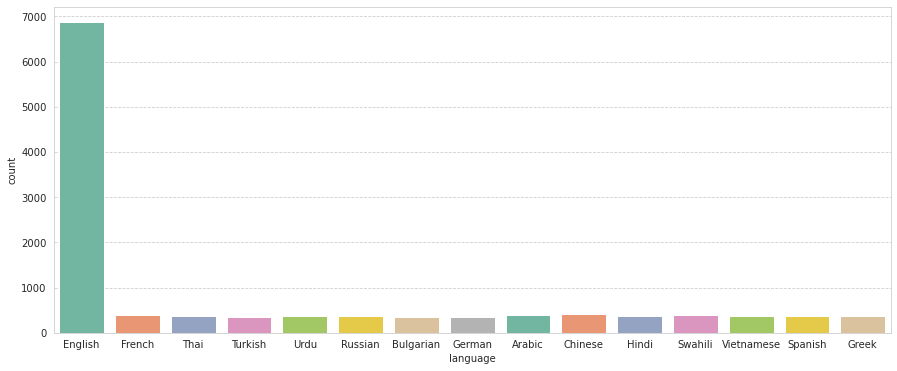

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(15,6))
sns.countplot(x="language", data=train_data, palette="Set2")
plt.show()

**Percentage Disribution of all the languages:**

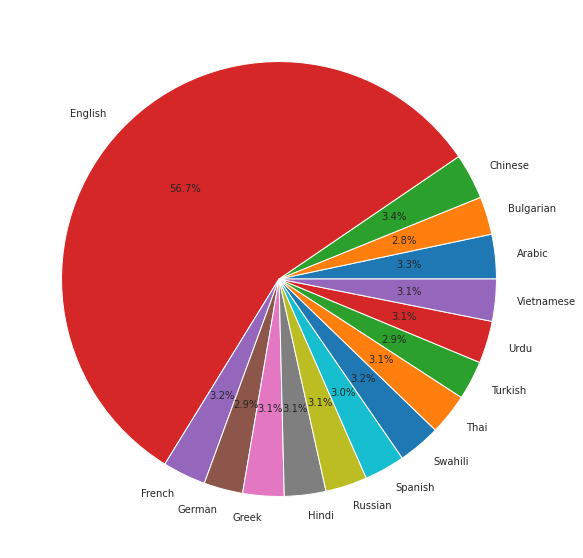

In [ ]:
labels, frequencies = np.unique(value, return_counts = True)
plt.figure(figsize = (20,10))
plt.pie(frequencies,labels = labels, autopct = '%.1f%%')
plt.show()


**OBSERVATIONS:**

1. From the above two distributions we can see that English is the most dominating language in the given dataset which is consisting of 56.7%.

2. And the rest of the languages are more or less equally distributed.

**Comparing the Languages Distribution in both Train and Test data:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

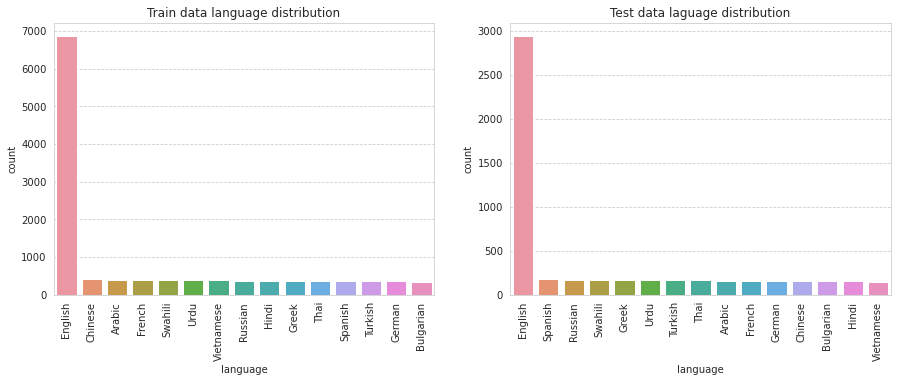

In [ ]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Train data language distribution')
sns.countplot(data = train_data, x = 'language', order = v.index)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Test data laguage distribution')
sns.countplot(data = test_data, x = 'language', order = test_data['language'].value_counts().index)
plt.xticks(rotation=90)

**OBSERVATIONS:**

From the above plots we can see that the language distribution in both train and test data are equal.

**Visualization of the Labels in the Data:**

* Here the target Variable is the "Label" attribute.

In [ ]:
value_label = train_data.label.values
value_label

array([0, 2, 0, ..., 2, 2, 0])

In [ ]:
train_data.label.value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

In [ ]:
v_label = pd.DataFrame()
v_label['Type'] = train_data.label.value_counts().index
v_label['Count'] = train_data.label.value_counts().values
v_label['Type']=v_label['Type'].replace(0,'Entailment')
v_label['Type']=v_label['Type'].replace(1,'Neutral')
v_label['Type']=v_label['Type'].replace(2,'Contradiction')
v_label

,Type,Count
0,Entailment,4176
1,Contradiction,4064
2,Neutral,3880


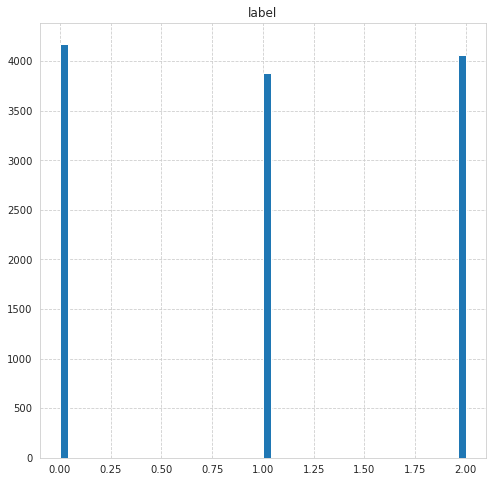

In [ ]:
train_data.hist(bins=50, figsize=(8,8))
plt.show()

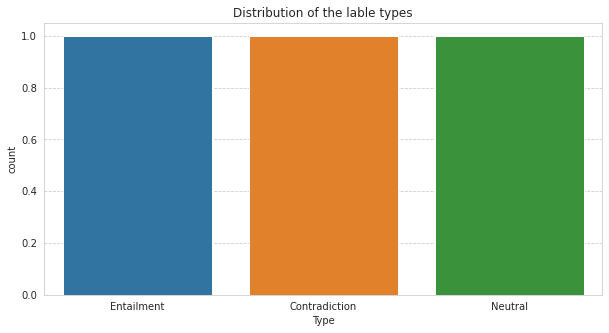

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(10,5))
sns.countplot(x="Type", data=v_label)
plt.title("Distribution of the lable types")
plt.show()

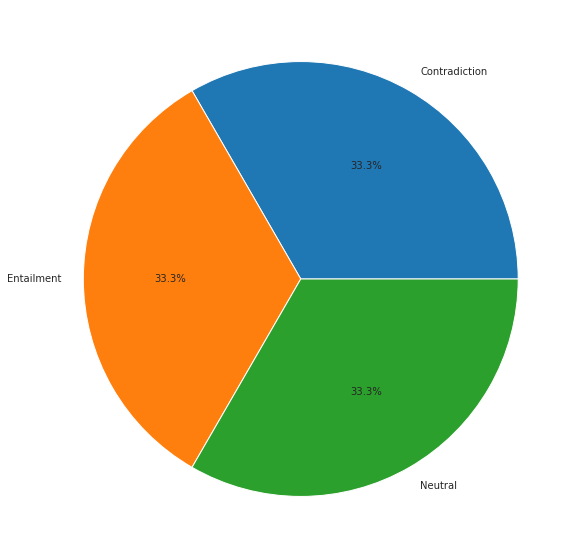

In [ ]:
labels, frequencies = np.unique(v_label['Type'], return_counts = True)
plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%.1f%%')
plt.show()

**OBSERVATIONS:**

    There are total of 12120 instances of the data, which contains 6 attributes/features

    There are total of 4176 records of Entailment
    
    There are total of 4064 records of Contradiction
    
    There are total of 3880 records of Neutral.

    Therefore, we can say that there is No Class Imblanace for the given data.

### 3. Prepare the Data
---
*(Clean and wrangle the data including fixing or removing outliers, dealing with missing values, feature scaling, feature transformation, and more. Write necessary functions for reuse and modularization.)*

**To check if any null value is present in the data:**

In [ ]:
train_data.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

**OBSERVATION:**

There are no missing values present in the data.

**Translating the non-english sentences into english sentences by using Googletrans:**

* Googletrans is a free and unlimited python library that implemented Google Translate API. This uses the Google Translate Ajax API to make calls to such methods as detect and translate.

Features which we will be using for our project:

    1. Fast and reliable - it uses the same servers that translate.google.com uses
    
    2. Auto language detection
    
    3. Bulk translations
    
* Since, we are having 15 different types of languages, we will use the GoogleTranslator to translate the non-english      langugaes into english language. 

* We will create seperate new Translated csv file for both the test and train data and run the below code only once.

In [ ]:
#def translate_data(df):
   # translator = Translator()
    #columns_to_translate = ['premise', 'hypothesis',]
   # for column in columns_to_translate:
     #   try:
          #  translated = translator.translate(df[column], dest='en')
      #  except Exception as e:
          #  print(str(e))
          #  continue
      #  df["translated_"+column] = translated.text
   # return df

In [ ]:
def Translation(df):
    translator = Translator()
    return translator.translate(df).text

In [ ]:
#train_data.premise[train_data.lang_abv!= 'en']=train_data.premise[train_data.lang_abv!= 'en'].apply(lambda x: Translation(x))

In [ ]:
#train_data.hypothesis[train_data.lang_abv!= 'en']=train_data.hypothesis[train_data.lang_abv!= 'en'].apply(lambda x: Translation(x))

In [ ]:
#train_data.to_csv(r'translated_train.csv', index = False)

**Translated Train data is as below:**

In [ ]:
train = pd.read_csv('../input/translated-data/translated_train.csv')
train.head(10)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Little things like these make a huge differenc...,I was trying to accomplish something.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,In role playing as well Opportunities to expre...,Children can see how different ethnic groups are.,th,Thai,1
5,ed7d6a1e62,You might hear someone on a farm saying we sho...,People on the farm use different terms.,tr,Turkish,0
6,5a0f4908a0,"On his return to the United States, Hajj met a...",The Hague was investigated by FBI agents,ur,Urdu,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
9,8c10229663,"Every hundred degrees, paint spots change colo...",The paint changes to match the color.,ru,Russian,0


**Translated Test data is as below:**

In [ ]:
#test_data.premise[test_data.lang_abv!= 'en']=test_data.premise[test_data.lang_abv!= 'en'].apply(lambda x: Translation(x))

In [ ]:
#test_data.hypothesis[test_data.lang_abv!= 'en']=test_data.hypothesis[test_data.lang_abv!= 'en'].apply(lambda x: Translation(x))

In [ ]:
#test_data.to_csv(r'translated_test.csv', index = False)

In [ ]:
test = pd.read_csv('../input/translated-data/translated_test.csv')
test.head(10)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,"The boxes will be named after Box, Casey, Rach...","There will be no memorial for Casey, one of Co...",ur,Urdu
1,cefcc82292,This is what we were advised to do.,"When they are told what to do, the administrat...",ar,Arabic
2,e98005252c,and this is largely due to the fact that mothe...,Mothers take drugs.,fr,French
3,58518c10ba,Dialogue &amp with representatives of cities a...,IMA cooperates with other organizations becaus...,zh,Chinese
4,c32b0d16df,She was still there.,"We thought that she left, however, she stayed.",ru,Russian
5,aa2510d454,His family had lost a son and a daughter now.,The son and daughter had lost their father.,en,English
6,865d1c7b16,Steps are initiated to allow program board mem...,There's enough room for 35-40 positions on the...,en,English
7,a16f7ed56b,It was probably the first thing I remembered f...,It was one of my earliest memories.,fr,French
8,6d9fa191e6,"agencies' operating trust, enterprise and inte...",Agencies in financial trouble are usually audi...,en,English
9,c156e8fed5,No one knew where they went.,Their arrival was a secret,sw,Swahili


# **Configuring the TPU:**

* Here, we are going to detect the hardware and return the appropriate distribution strategy.

* A TPU needs to found and setup to work with the models which we will be using in the notebook.

* A strategy needs to be defined regarding how the model will replicated accross the GPU chips on the TPU board and how these replica's model will be merged back together once the training has completed of various models.

* This piece of the code below will define the defualt distribution strategy in Tensorflow and work on finding a TPU or gets CPU and single GPU if its not available and sets it up.

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy()

    
print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8


### 4. Shortlist Promising Models
---
*(If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time.Try to automate these steps as much as possible. Train many quick-and-dirty models from different categories using standard parameters. Measure and compare their performance. For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
Analyze the most significant variables for each algorithm. Analyze the types of errors the models make. Perform a quick round of feature selection and engineering. Perform one or two more quick iterations of the above steps. Shortlist the top three to five most promising models.)*

**Models:**

* We have trained computer vision models which have built models with "backbones". These are pre-trained models whose weights can be generalised to a new task. Stick some extra layers (the head) to the end of the model to handle the new task and you have a model that benefits from cutting edge trained but that is still built to complete the current task in mind.

* We will be building a model where we will be  using roberta as the backbone and a sofmax layer on the end to apply the correct class (entailment, neutral, contradiction or 0, 1, 2).

* BERT (the original language transformer model that models like roberta are based on) is quite a complex model. 

* As Transfer Learning from large-scale pre-trained models becomes more prevalent in Natural Language Processing (NLP), operating these large models in on-the-edge and/or under constrained computational training or inference budgets remains challenging. In this work, we propose a method to pre-train a smaller general-purpose language representation model, called DistilBERT.The use of distillation for building task-specific models, we leverage knowledge distillation during the pre-training phase and show that it is possible to reduce the size of a BERT model by 40%, while retaining 97% of its language understanding capabilities and being 60% faster. To leverage the inductive biases learned by larger models during pre-training, we introduce a triple loss combining language modeling, distillation and cosine-distance losses. Our smaller, faster and lighter model is cheaper to pre-train.

* We have used the transformers concept here where the import of the transformers allows us to use the pre-trained models from "Hugging Face". [https://huggingface.co/transformers/index.html]


* Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between TensorFlow 2.0 and PyTorch.


**Features:**

    High performance on NLU and NLG tasks

    Low barrier to entry for educators and practitioners

    State-of-the-art NLP for everyone:

        Deep learning researchers

        Hands-on practitioners

        AI/ML/NLP teachers and educators

    Lower compute costs, smaller carbon footprint:

        Researchers can share trained models instead of always retraining

        Practitioners can reduce compute time and production costs

        8 architectures with over 30 pretrained models, some in more than 100 languages

    Choose the right framework for every part of a model’s lifetime:

        Train state-of-the-art models in 3 lines of code

        Deep interoperability between TensorFlow 2.0 and PyTorch models

        Move a single model between TF2.0/PyTorch frameworks at will

        Seamlessly pick the right framework for training, evaluation, production

# **XLM-RoBERTa Model:**

**Overview:**

The XLM-RoBERTa model was proposed in Unsupervised Cross-lingual Representation Learning at Scale by Alexis Conneau, Kartikay Khandelwal, Naman Goyal, Vishrav Chaudhary, Guillaume Wenzek, Francisco Guzmán, Edouard Grave, Myle Ott, Luke Zettlemoyer and Veselin Stoyanov. It is based on Facebook’s RoBERTa model released in 2019. It is a large multi-lingual language model, trained on 2.5TB of filtered CommonCrawl data.

The abstract from the paper is the following:

This paper shows that pretraining multilingual language models at scale leads to significant performance gains for a wide range of cross-lingual transfer tasks. We train a Transformer-based masked language model on one hundred languages, using more than two terabytes of filtered CommonCrawl data. Our model, dubbed XLM-R, significantly outperforms multilingual BERT (mBERT) on a variety of cross-lingual benchmarks, including +13.8% average accuracy on XNLI, +12.3% average F1 score on MLQA, and +2.1% average F1 score on NER. XLM-R performs particularly well on low-resource languages, improving 11.8% in XNLI accuracy for Swahili and 9.2% for Urdu over the previous XLM model. We also present a detailed empirical evaluation of the key factors that are required to achieve these gains, including the trade-offs between (1) positive transfer and capacity dilution and (2) the performance of high and low resource languages at scale. Finally, we show, for the first time, the possibility of multilingual modeling without sacrificing per-language performance; XLM-Ris very competitive with strong monolingual models on the GLUE and XNLI benchmarks. We will make XLM-R code, data, and models publicly available.


Several versions of xlm roberta are available in the Transformers library. Here are two:

* xlm-roberta-base

* xlm-roberta-large

This is the link to the XLM-RoBERTa paper:

https://arxiv.org/pdf/1911.02116.pdf

# **XLM-RoBERTa Model: (Large)**

**Defining Parameters to be used:**

To be able to tweak the parameters of the model we have defined them as globals.

The batch size needed to be multiplied by the number of replicas which is 8. 
This is simply to make sure each of the eight GPU chips in the TPU uses the specified batch size and not one eighth of that number.

In [ ]:
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE
step = len(train_data) // BATCH_SIZE

**Building The Model defination:**

* We have used the classmethodfrom_pretrained(pretrained_model_name_or_path, *model_args, **kwargs)

* Then we load the strategy which we have defined above.

* [cls] token is the sequence approximate i.e. the classifier token is used when doing sequence classification ( classification of the whole sequence instead of per-token classification). It is the first token of the sequence when built with special tokens.

* Then we apply the softmax layer that produces the class and compile the model.

In [ ]:
def model_defination(strategy,transformer):
    with strategy.scope():
        encoder = TFAutoModel.from_pretrained(transformer)
        input_layer = Input(shape=(30,), dtype=tf.int32, name="input_layer")
        sequence_output = encoder(input_layer)[0]
        cls_token = sequence_output[:, 0, :]
        output_layer = Dense(3, activation='softmax')(cls_token)
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(
            Adam(lr=1e-5), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
        )
        return model

* After we have compiled the model above we are going to call the model_defination and load our pre-trained model into the strategy.

In [ ]:
model=model_defination(strategy,"jplu/tf-xlm-roberta-large")

Below shows us the summary of the Model which we have loaded above in the model defination.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 30)]              0         
_________________________________________________________________
tf_roberta_model (TFRobertaM ((None, 30, 1024), (None, 559890432 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 1024)]            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3075      
Total params: 559,893,507
Trainable params: 559,893,507
Non-trainable params: 0
_________________________________________________________________


**Tokenizing: With (xlm-roberta-large)**

* As a Machine Learning model a language model works with numbers, not text. 

* We need to be tokenizing them to prepare the sentences for training.

* These tokens are number indexes that represent each of the words. Each model has it's own unique set of tokens.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('jplu/tf-xlm-roberta-large')

**Creating 3-folds for using in our model:**

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

# shuffle
df = shuffle(train_data)

# initialize kfold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1024)

# for stratification
y = df['label']

# Put the folds into a list. This is a list of tuples.
fold_list = list(kf.split(df, y))

train_df_list = []
val_df_list = []

for i, fold in enumerate(fold_list):

    # map the train and val index values to dataframe rows
    df_train = df[df.index.isin(fold[0])]
    df_val = df[df.index.isin(fold[1])]
    
    train_df_list.append(df_train)
    val_df_list.append(df_val)
    
    

print(len(train_df_list))
print(len(val_df_list))

3
3


In [ ]:
# Display one train fold:

df_train = train_df_list[0]

df_train.head()

,id,premise,hypothesis,lang_abv,language,label
6949,789993fbb7,14 Managing for Federal Managers' Views Show ...,The documentation for Ensuring Top Leadership ...,en,English,0
8253,e82b280216,الفصل الثامن الإفراغ. أمر لهذه الشركة الفاشلة,يتم طلب التفريغ المشين لهذا الشخص.,ar,Arabic,0
12059,0c68700117,"Bao gồm các yếu tố như khung thời gian ngắn, v...",Họ đã xóa các tệp máy tính khỏi IBM.,vi,Vietnamese,1
1218,64b2f1a18d,The Times says this tracking list is drawn up ...,Publishers say one things about Times' drawing...,en,English,0
11992,92d0ddda05,Et qui diable pouvez-vous être? explosa-t-il e...,Il se murmura tranquillement à lui-même tout l...,fr,French,2


In [ ]:
# Display one val fold

df_val = val_df_list[0]

df_val.head()

,id,premise,hypothesis,lang_abv,language,label
1569,ff250b974c,Se evacuó la terminal y la policía encontró pa...,La policía encontró varios artículos en las ma...,es,Spanish,0
11481,e436387808,Act Accounting the Great Management Reform Act,Accounting bad management,en,English,2
437,e6d717a178,Even if you're the kind of traveler who likes ...,Tourist officers are a good place to visit eve...,en,English,0
12105,e70456a114,The story of the technology business gets spic...,Reality is so bland that the technology busine...,en,English,0
5515,897a9fb58a,so i don't completely agree with that either,And I totally agree with that too.,en,English,2


**Creating the training, validation and test sets:**

In [ ]:
train_set = df_train[['premise','hypothesis']].values.tolist()
test_set = test_data[['premise','hypothesis']].values.tolist()

**Encoding the Data:**

In [ ]:
encoded_train = tokenizer.batch_encode_plus(train_set, pad_to_max_length=True, max_length=30)
encoded_test = tokenizer.batch_encode_plus(test_set, pad_to_max_length=True, max_length=30)

Below example shows what the tokenizer has done to the first sentence at "premise[0]":

**The textual form of the data:**

In [ ]:
df_train.premise.values[0]

'Ъгловата къща на номер 8 доскоро беше официалната резиденция на президента на Generalitat.'

Below is the few tokens from the above sentence:

In [ ]:
print(encoded_train.input_ids[0][0:20])

[0, 6, 35448, 27988, 34467, 124752, 29, 18315, 382, 255, 54240, 4404, 230479, 205, 6, 150652, 2582, 8007, 29, 2]


Below example shows what the tokenizer has done to the first sentence at "hypothesis[0]":

In [ ]:
df_train.hypothesis.values[0]

'Номер 8 беше на ъгъла.'

Below are the token for the above sentence:

In [ ]:
print(encoded_train.input_ids[0][20:32])

[2, 171455, 382, 4404, 29, 6, 155559, 59, 5, 2]


* So we can see above sentences has been split into an array, where each word is represented by a number index. 

* The tokeniser even splits the words themselves up into sub words.

**Below we are checking the vocab which the tokenizer has tokens defined:**

In [ ]:
# vocab size

tokenizer.vocab_size

250002

In [ ]:
# the special tokens

tokenizer.special_tokens_map

{'bos_token': '<s>',
 'eos_token': '</s>',
 'unk_token': '<unk>',
 'sep_token': '</s>',
 'pad_token': '<pad>',
 'cls_token': '<s>',
 'mask_token': '<mask>'}

In [ ]:
print('bos_token_id <s>:', tokenizer.bos_token_id)
print('eos_token_id </s>:', tokenizer.eos_token_id)
print('sep_token_id </s>:', tokenizer.sep_token_id)
print('pad_token_id <pad>:', tokenizer.pad_token_id)

bos_token_id <s>: 0
eos_token_id </s>: 2
sep_token_id </s>: 2
pad_token_id <pad>: 1


* The token 0 represents "\<\s>", which represents the start of a sentence.

* When a model has two inputs (like a premise and hypothesis) the transformer will merge the tokens from the two sentences into the one array. 

* The "\<\s>" token is used to denote the end of the the premise and the beginning of the hypothesis.

**Train and Test Split:**

* Splitting the dataset into respective training and validation set.

* Using the 3-folds which are created above.

In [ ]:
# using the first fold(0):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

**Pipeline:**

* When we are using the tensorflow and TPUs it is best to build a data pipeline.

* This pipeline is build using tensorflows data api. Which provides a better performance during training.

* In the pipeline we insert the data using the from tensor slices commmand, shuffle it, batch it and prefetch the next batch while the model is training on the current batch.

In [ ]:
train_df = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

**Training the Model: at different Epoch values(3 and 5)**


Where "Epoch" is one complete presentation of the whole dataset which is needed to be learned by the machine.
The number of epochs represent the hyperparameter of "Gradient Descent" which controls the number of complete passes which the machine makes when it is passing through the training dataset.

* Here, we will first find out the best epoch and then run our the next 2 folds on that epoch for this model.

In [ ]:
#At epochs=3
model_3 = model.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=3)

Epoch 1/3
94/94 [==============================] - 45s 477ms/step - loss: 1.2283 - accuracy: 0.3598 - val_loss: 1.0239 - val_accuracy: 0.4967
Epoch 2/3
94/94 [==============================] - 19s 205ms/step - loss: 0.9593 - accuracy: 0.5389 - val_loss: 0.8021 - val_accuracy: 0.6403
Epoch 3/3
94/94 [==============================] - 19s 205ms/step - loss: 0.6867 - accuracy: 0.6961 - val_loss: 0.7906 - val_accuracy: 0.6844


In [ ]:
print("validation accuracy {}".format(np.mean(model_3.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3.history['accuracy'])))
print("loss {}".format(np.mean(model_3.history['loss'])))

validation accuracy 0.6071231861909231
validation loss 0.8721868991851807
accuracy 0.5315824250380198
loss 0.9581003785133362


In [ ]:
print("validation accuracy {}".format(np.std(model_3.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3.history['val_loss'])))
print("accuracy {}".format(np.std(model_3.history['accuracy'])))
print("loss {}".format(np.std(model_3.history['loss'])))

validation accuracy 0.08013382174919974
validation loss 0.10736043807917348
accuracy 0.13737900889443144
loss 0.2211170247486378


In [ ]:
#At epochs=5
model_5 = model.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=5)

Epoch 1/5
94/94 [==============================] - 19s 206ms/step - loss: 0.4798 - accuracy: 0.8054 - val_loss: 1.1856 - val_accuracy: 0.6403
Epoch 2/5
94/94 [==============================] - 20s 211ms/step - loss: 0.2860 - accuracy: 0.8905 - val_loss: 1.2987 - val_accuracy: 0.6638
Epoch 3/5
94/94 [==============================] - 20s 208ms/step - loss: 0.1518 - accuracy: 0.9444 - val_loss: 1.5853 - val_accuracy: 0.6646
Epoch 4/5
94/94 [==============================] - 19s 204ms/step - loss: 0.1114 - accuracy: 0.9598 - val_loss: 1.7562 - val_accuracy: 0.6646
Epoch 5/5
94/94 [==============================] - 19s 206ms/step - loss: 0.0710 - accuracy: 0.9761 - val_loss: 1.7819 - val_accuracy: 0.6658


In [ ]:
print("validation accuracy {}".format(np.mean(model_5.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_5.history['val_loss'])))
print("accuracy {}".format(np.mean(model_5.history['accuracy'])))
print("loss {}".format(np.mean(model_5.history['loss'])))

validation accuracy 0.659818458557129
validation loss 1.5215483903884888
accuracy 0.9152426600456238
loss 0.21997296512126924


In [ ]:
print("validation accuracy {}".format(np.std(model_5.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_5.history['val_loss'])))
print("accuracy {}".format(np.std(model_5.history['accuracy'])))
print("loss {}".format(np.std(model_5.history['loss'])))

validation accuracy 0.00979941108587573
validation loss 0.24061277645976337
accuracy 0.06199075354187855
loss 0.14865844864893016


* Accuracy -  is calculated on the training data. This tells us the percentage of the instances that are correctly classified.

* Val_accuracy - is calculated on the validation data. This is a measure of how good the predictions are of the model.

* Loss - This represents the training loss which is the average of the losses occuring over every batch of the training data.

* Val_loss - This tells us the loss occuring over every batch of the test data. Which is the unseen data at this point of time.


**OBSERVATIONS:**

* At the start since, the model is changing over the time, the loss over the first batch of the training data of an epoch is generally higher than the last batches of the data.

* We can tell the model is getting trained in a good way when the two losses(loss and the val_loss) are decreasing over each epoch and the two accuracies(accuracy and val_accuracy) are increasing gradually.

* Now if we see the last batch of each epoch at 3 and 5 we can see the following:

    * At epoch=3 loss and val_loss has decreased and accuracy and val_accuracy has increased.
    
    * At epoch = 5 loss is decreasing but val_loss is increasing. And accuracy is increasing whereas val_accuracy has reached constant.
    
    Hence, we stop at epoch = 5 otherwise the model is getting overfitted.

**Now we will run the next fold at [1] for epoch = 3 value:**

In [ ]:
df_train1 = train_df_list[1]

In [ ]:
train_set1 = df_train1[['premise','hypothesis']].values.tolist()
test_set1 = test_data[['premise','hypothesis']].values.tolist()

In [ ]:
encoded_train1 = tokenizer.batch_encode_plus(train_set1, pad_to_max_length=True, max_length=30)
encoded_test1 = tokenizer.batch_encode_plus(test_set1, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(1):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train1['input_ids'], df_train1.label.values, test_size=0.3)

x_test = encoded_test1['input_ids']

In [ ]:
train_df1 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df1 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df1 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_3_1 = model.fit(train_df1,steps_per_epoch=step,validation_data=valid_df1,epochs=3)

Epoch 1/3
94/94 [==============================] - 19s 203ms/step - loss: 0.5955 - accuracy: 0.7791 - val_loss: 0.6960 - val_accuracy: 0.7859
Epoch 2/3
94/94 [==============================] - 19s 204ms/step - loss: 0.3268 - accuracy: 0.8787 - val_loss: 0.7773 - val_accuracy: 0.7781
Epoch 3/3
94/94 [==============================] - 19s 205ms/step - loss: 0.1701 - accuracy: 0.9381 - val_loss: 0.9998 - val_accuracy: 0.7809


In [ ]:
print("validation accuracy {}".format(np.mean(model_3_1.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3_1.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3_1.history['accuracy'])))
print("loss {}".format(np.mean(model_3_1.history['loss'])))

validation accuracy 0.7816281318664551
validation loss 0.82438592116038
accuracy 0.8652758995691935
loss 0.36415209372838336


In [ ]:
print("validation accuracy {}".format(np.std(model_3_1.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3_1.history['val_loss'])))
print("accuracy {}".format(np.std(model_3_1.history['accuracy'])))
print("loss {}".format(np.std(model_3_1.history['loss'])))

validation accuracy 0.00323669628457178
validation loss 0.12838618328349735
accuracy 0.06559447740771429
loss 0.17569209990105752


**Now we will run the next fold at [2] for epoch = 3 value:**

In [ ]:
df_train2 = train_df_list[2]

In [ ]:
train_set2 = df_train2[['premise','hypothesis']].values.tolist()
test_set2 = test_data[['premise','hypothesis']].values.tolist()

In [ ]:
encoded_train2 = tokenizer.batch_encode_plus(train_set2, pad_to_max_length=True, max_length=30)
encoded_test2 = tokenizer.batch_encode_plus(test_set2, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(2):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train2['input_ids'], df_train2.label.values, test_size=0.3)

x_test = encoded_test2['input_ids']

In [ ]:
train_df2 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df2 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df2 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_3_2 = model.fit(train_df2,steps_per_epoch=step,validation_data=valid_df2,epochs=3)

Epoch 1/3
94/94 [==============================] - 19s 206ms/step - loss: 0.3973 - accuracy: 0.8636 - val_loss: 0.3862 - val_accuracy: 0.8837
Epoch 2/3
94/94 [==============================] - 19s 205ms/step - loss: 0.1854 - accuracy: 0.9365 - val_loss: 0.4700 - val_accuracy: 0.8717
Epoch 3/3
94/94 [==============================] - 19s 205ms/step - loss: 0.0938 - accuracy: 0.9674 - val_loss: 0.6420 - val_accuracy: 0.8589


In [ ]:
print("validation accuracy {}".format(np.mean(model_3_2.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3_2.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3_2.history['accuracy'])))
print("loss {}".format(np.mean(model_3_2.history['loss'])))

validation accuracy 0.8714246153831482
validation loss 0.4993996322154999
accuracy 0.922512153784434
loss 0.22553849965333939


In [ ]:
print("validation accuracy {}".format(np.std(model_3_2.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3_2.history['val_loss'])))
print("accuracy {}".format(np.std(model_3_2.history['accuracy'])))
print("loss {}".format(np.std(model_3_2.history['loss'])))

validation accuracy 0.010107035851124355
validation loss 0.10647015680830474
accuracy 0.04351817489412828
loss 0.12711183895013067


 Model_name at epoch=3                   |  n-fold      |  mean_loss    | mean_val_loss  | mean_accuracy | mean_val_accuracy |
 ----------------------------------------|--------------|---------------|----------------|---------------|-------------------|
 XLM-RoBERTa Model: (Large)              |   1          | 0.95          | 0.87           |  0.53         |  0.60             |
 XLM-RoBERTa Model: (Large)              |   2          | 0.36          | 0.82           |  0.86         |   0.78            |
 XLM-RoBERTa Model: (Large)              |   3          | 0.22          | 0.49           |  0.92         |  0.87             |

# **Visualizing of the model at epoch = 3 for better understanding:**

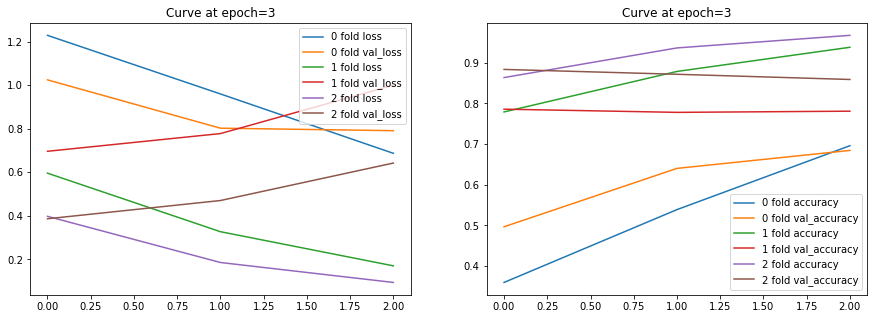

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(model_3.history['loss'], label = '0 fold loss')
plt.plot(model_3.history['val_loss'], label = '0 fold val_loss')
plt.plot(model_3_1.history['loss'], label = '1 fold loss')
plt.plot(model_3_1.history['val_loss'], label = '1 fold val_loss')
plt.plot(model_3_2.history['loss'], label = '2 fold loss')
plt.plot(model_3_2.history['val_loss'], label = '2 fold val_loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(model_3.history['accuracy'], label = '0 fold accuracy')
plt.plot(model_3.history['val_accuracy'], label = '0 fold val_accuracy')
plt.plot(model_3_1.history['accuracy'], label = '1 fold accuracy')
plt.plot(model_3_1.history['val_accuracy'], label = '1 fold val_accuracy')
plt.plot(model_3_2.history['accuracy'], label = '2 fold accuracy')
plt.plot(model_3_2.history['val_accuracy'], label = '2 fold val_accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATION:**

* As per the above visualization graph the model fits good at fold(0) and at epoch = 3 value.

* Hence, we will be considering this value for the XLM-RoBERTa Large model. 

# **XLM-RoBERTa Model: (BASE)**

In [ ]:
model1=model_defination(strategy,"jplu/tf-xlm-roberta-base")

In [ ]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 30)]              0         
_________________________________________________________________
tf_roberta_model_1 (TFRobert ((None, 30, 768), (None,  278043648 
_________________________________________________________________
tf_op_layer_strided_slice_1  [(None, 768)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2307      
Total params: 278,045,955
Trainable params: 278,045,955
Non-trainable params: 0
_________________________________________________________________


**Tokenizing: With (xlm-roberta-base)**

In [ ]:
tokenizer1 = AutoTokenizer.from_pretrained('jplu/tf-xlm-roberta-base')

*** For n-fold(0):**

In [ ]:
encoded_train = tokenizer1.batch_encode_plus(train_set, pad_to_max_length=True, max_length=30)
encoded_test = tokenizer1.batch_encode_plus(test_set, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(0):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

In [ ]:
train_df = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_3_b = model1.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=3)

Epoch 1/3
94/94 [==============================] - 22s 236ms/step - accuracy: 0.3230 - loss: 1.1078 - val_accuracy: 0.3981 - val_loss: 1.0873
Epoch 2/3
94/94 [==============================] - 10s 107ms/step - accuracy: 0.4953 - loss: 1.0102 - val_accuracy: 0.5326 - val_loss: 0.9733
Epoch 3/3
94/94 [==============================] - 10s 108ms/step - accuracy: 0.6085 - loss: 0.8653 - val_accuracy: 0.5854 - val_loss: 0.9266


In [ ]:
print("validation accuracy {}".format(np.mean(model_3_b.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3_b.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3_b.history['accuracy'])))
print("loss {}".format(np.mean(model_3_b.history['loss'])))

validation accuracy 0.5053630073865255
validation loss 0.9957257707913717
accuracy 0.47559284170468646
loss 0.9944306015968323


In [ ]:
print("validation accuracy {}".format(np.std(model_3_b.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3_b.history['val_loss'])))
print("accuracy {}".format(np.std(model_3_b.history['accuracy'])))
print("loss {}".format(np.std(model_3_b.history['loss'])))

validation accuracy 0.07884899341105765
validation loss 0.06749339144893493
accuracy 0.11738420468346415
loss 0.09964340061469798


In [ ]:
#Epochs=5
model_3_b5 = model1.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=5)

Epoch 1/5
94/94 [==============================] - 10s 104ms/step - accuracy: 0.6951 - loss: 0.7258 - val_accuracy: 0.6015 - val_loss: 1.0142
Epoch 2/5
94/94 [==============================] - 10s 105ms/step - accuracy: 0.7712 - loss: 0.5607 - val_accuracy: 0.5837 - val_loss: 1.2224
Epoch 3/5
94/94 [==============================] - 10s 105ms/step - accuracy: 0.8356 - loss: 0.4253 - val_accuracy: 0.5936 - val_loss: 1.4528
Epoch 4/5
94/94 [==============================] - 10s 107ms/step - accuracy: 0.8945 - loss: 0.2915 - val_accuracy: 0.5809 - val_loss: 1.7085
Epoch 5/5
94/94 [==============================] - 10s 109ms/step - accuracy: 0.9313 - loss: 0.2040 - val_accuracy: 0.5870 - val_loss: 1.9792


In [ ]:
print("validation accuracy {}".format(np.mean(model_3_b5.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3_b5.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3_b5.history['accuracy'])))
print("loss {}".format(np.mean(model_3_b5.history['loss'])))

validation accuracy 0.5893564105033875
validation loss 1.4754141569137573
accuracy 0.8255651354789734
loss 0.44145719408988954


In [ ]:
print("validation accuracy {}".format(np.std(model_3_b5.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3_b5.history['val_loss'])))
print("accuracy {}".format(np.std(model_3_b5.history['accuracy'])))
print("loss {}".format(np.std(model_3_b5.history['loss'])))

validation accuracy 0.007410144980711722
validation loss 0.34217107907881295
accuracy 0.0848679685881401
loss 0.18665876997596795


**OBSERVATIONS:**

* Now if we see the last batch of each epoch at 3 and 5 we can see the following:

    * At epoch=3 loss has decreased and val_loss has decreased and accuracy has increased and val_accuracy has also increased.
    * At epoch = 5 loss is decreasing and val_loss is increasing. And accuracy is increasing whereas val_accuracy has reached constant.
    
    
 Hence, we stop at epoch = 5 otherwise the model is getting overfitted.
 
 Hence, we consider the epoch value as 3.

*** For n-fold(1):**

In [ ]:
encoded_train1 = tokenizer1.batch_encode_plus(train_set1, pad_to_max_length=True, max_length=30)
encoded_test1 = tokenizer1.batch_encode_plus(test_set1, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(1):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train1['input_ids'], df_train1.label.values, test_size=0.3)

x_test = encoded_test1['input_ids']

In [ ]:
train_df1 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df1 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df1 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_3_b1 = model1.fit(train_df1,steps_per_epoch=step,validation_data=valid_df1,epochs=3)

Epoch 1/3
94/94 [==============================] - 10s 109ms/step - accuracy: 0.7265 - loss: 0.7831 - val_accuracy: 0.7104 - val_loss: 0.7322
Epoch 2/3
94/94 [==============================] - 10s 108ms/step - accuracy: 0.7905 - loss: 0.5524 - val_accuracy: 0.7108 - val_loss: 0.8101
Epoch 3/3
94/94 [==============================] - 10s 108ms/step - accuracy: 0.8474 - loss: 0.4044 - val_accuracy: 0.7050 - val_loss: 0.9922


In [ ]:
print("validation accuracy {}".format(np.mean(model_3_b1.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3_b1.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3_b1.history['accuracy'])))
print("loss {}".format(np.mean(model_3_b1.history['loss'])))

validation accuracy 0.7087458570798238
validation loss 0.8448084195454916
accuracy 0.7881205280621847
loss 0.5799646774927775


In [ ]:
print("validation accuracy {}".format(np.std(model_3_b1.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3_b1.history['val_loss'])))
print("accuracy {}".format(np.std(model_3_b1.history['accuracy'])))
print("loss {}".format(np.std(model_3_b1.history['loss'])))

validation accuracy 0.0026307810207274874
validation loss 0.10897338865830752
accuracy 0.049396523384985264
loss 0.1558029531385861


*** For n-fold(2):**

In [ ]:
encoded_train2 = tokenizer1.batch_encode_plus(train_set2, pad_to_max_length=True, max_length=30)
encoded_test2 = tokenizer1.batch_encode_plus(test_set2, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(2):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train2['input_ids'], df_train2.label.values, test_size=0.3)

x_test = encoded_test2['input_ids']

In [ ]:
train_df2 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df2 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df2 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_3_b2 = model1.fit(train_df2,steps_per_epoch=step,validation_data=valid_df2,epochs=3)

Epoch 1/3
94/94 [==============================] - 10s 106ms/step - accuracy: 0.8187 - loss: 0.5081 - val_accuracy: 0.8309 - val_loss: 0.5088
Epoch 2/3
94/94 [==============================] - 10s 106ms/step - accuracy: 0.8782 - loss: 0.3431 - val_accuracy: 0.8317 - val_loss: 0.5791
Epoch 3/3
94/94 [==============================] - 10s 105ms/step - accuracy: 0.9216 - loss: 0.2246 - val_accuracy: 0.8086 - val_loss: 0.7434


In [ ]:
print("validation accuracy {}".format(np.mean(model_3_b2.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3_b2.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3_b2.history['accuracy'])))
print("loss {}".format(np.mean(model_3_b2.history['loss'])))

validation accuracy 0.8237073421478271
validation loss 0.6104367772738138
accuracy 0.8728113571802775
loss 0.3586171865463257


In [ ]:
print("validation accuracy {}".format(np.std(model_3_b2.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3_b2.history['val_loss'])))
print("accuracy {}".format(np.std(model_3_b2.history['accuracy'])))
print("loss {}".format(np.std(model_3_b2.history['loss'])))

validation accuracy 0.010701372190016508
validation loss 0.09832239338831969
accuracy 0.04220918754190174
loss 0.11625383751115935


# **Visualizing of the model at epoch = 3 for better understanding:**

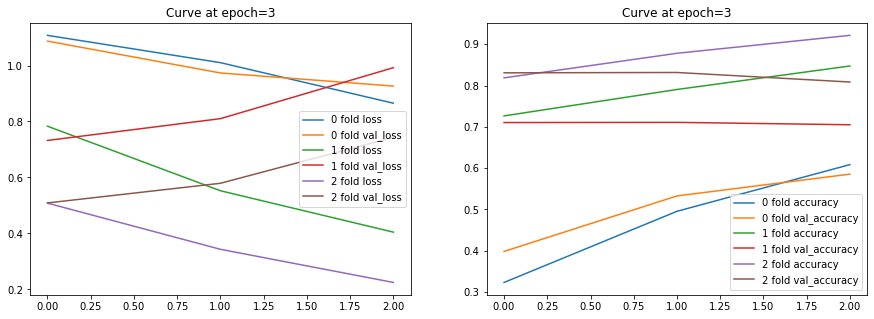

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(model_3_b.history['loss'], label = '0 fold loss')
plt.plot(model_3_b.history['val_loss'], label = '0 fold val_loss')
plt.plot(model_3_b1.history['loss'], label = '1 fold loss')
plt.plot(model_3_b1.history['val_loss'], label = '1 fold val_loss')
plt.plot(model_3_b2.history['loss'], label = '2 fold loss')
plt.plot(model_3_b2.history['val_loss'], label = '2 fold val_loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(model_3_b.history['accuracy'], label = '0 fold accuracy')
plt.plot(model_3_b.history['val_accuracy'], label = '0 fold val_accuracy')
plt.plot(model_3_b1.history['accuracy'], label = '1 fold accuracy')
plt.plot(model_3_b1.history['val_accuracy'], label = '1 fold val_accuracy')
plt.plot(model_3_b2.history['accuracy'], label = '2 fold accuracy')
plt.plot(model_3_b2.history['val_accuracy'], label = '2 fold val_accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATIONS:**

* As per the above visualization graph the model fits good at fold(0) and at epoch = 3 value.

* Hence, we will be considering this value for the XLM-RoBERTa Base model.

 Model_name at epoch=3                   |  n-fold      |  mean_loss    | mean_val_loss  | mean_accuracy | mean_val_accuracy |
 ----------------------------------------|--------------|---------------|----------------|---------------|-------------------|
 XLM-RoBERTa Model: (Base)               |   1          | 0.99          | 0.99           |  0.47         |  0.50             |
 XLM-RoBERTa Model: (Base)               |   2          | 0.57          | 0.84           |  0.78         |  0.70             |
 XLM-RoBERTa Model: (Base)               |   3          | 0.35          | 0.61           |  0.87         |  0.82             |

# **For Model: xlm-roberta-base, let us experiment with XLMRobertaTokenizer for Tokenizing:**

* Since, we have found that at epoch = 3 and at n-fold(0) the model is fitting well we will experiment at these values for the XLMRoberta Tokenizer.

In [ ]:
tokenizer3 = XLMRobertaTokenizer.from_pretrained('jplu/tf-xlm-roberta-base')

In [ ]:
encoded_train = tokenizer3.batch_encode_plus(train_set, pad_to_max_length=True, max_length=30)
encoded_test = tokenizer3.batch_encode_plus(test_set, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(0):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

In [ ]:
train_df_x = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df_x = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df_x = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_3_b_x = model1.fit(train_df_x,steps_per_epoch=step,validation_data=valid_df_x,epochs=3)

Epoch 1/3
94/94 [==============================] - 10s 106ms/step - accuracy: 0.9159 - loss: 0.2554 - val_accuracy: 0.9237 - val_loss: 0.2815
Epoch 2/3
94/94 [==============================] - 10s 105ms/step - accuracy: 0.9529 - loss: 0.1377 - val_accuracy: 0.9216 - val_loss: 0.3404
Epoch 3/3
94/94 [==============================] - 10s 106ms/step - accuracy: 0.9679 - loss: 0.0903 - val_accuracy: 0.9196 - val_loss: 0.3863


In [ ]:
print("validation accuracy {}".format(np.mean(model_3_b_x.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_3_b_x.history['val_loss'])))
print("accuracy {}".format(np.mean(model_3_b_x.history['accuracy'])))
print("loss {}".format(np.mean(model_3_b_x.history['loss'])))

validation accuracy 0.9216171304384867
validation loss 0.3360874553521474
accuracy 0.9455618063608805
loss 0.16112951934337616


In [ ]:
print("validation accuracy {}".format(np.std(model_3_b_x.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_3_b_x.history['val_loss'])))
print("accuracy {}".format(np.std(model_3_b_x.history['accuracy'])))
print("loss {}".format(np.std(model_3_b_x.history['loss'])))

validation accuracy 0.0016841941433464543
validation loss 0.04290528815389834
accuracy 0.021860855322319434
loss 0.06940584326655691


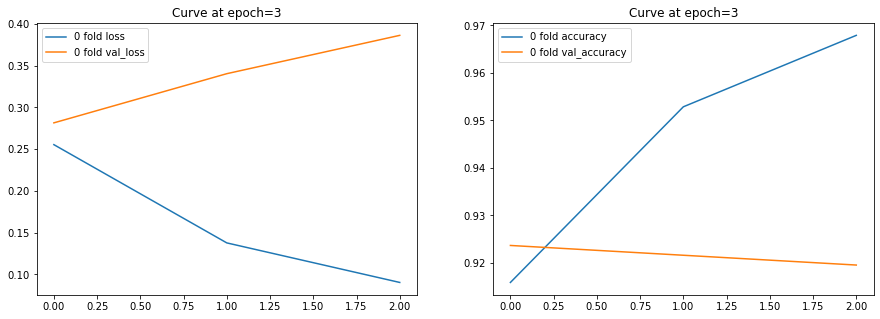

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(model_3_b_x.history['loss'], label = '0 fold loss')
plt.plot(model_3_b_x.history['val_loss'], label = '0 fold val_loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(model_3_b_x.history['accuracy'], label = '0 fold accuracy')
plt.plot(model_3_b_x.history['val_accuracy'], label = '0 fold val_accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATIONS:**

* For Model: xlm-roberta-base, experimenting with XLMRobertaTokenizer has not given any better outcome than the previous models.

* xlm-roberta-base with XLMRobertaTokenizer at epoch = 3 has performed the worst among other xlm-roberta models.



 Model_name at epoch=3                   |  n-fold      |  mean_loss    | mean_val_loss  | mean_accuracy | mean_val_accuracy |
 ----------------------------------------|--------------|---------------|----------------|---------------|-------------------|
 XLM-RoBERTa Model: (Large)              |   1          | 1.03          | 0.97           |  0.48         |  0.52             |
 XLM-RoBERTa Model: (Large)              |   2          | 0.17          | 0.43           |  0.93         |  0.89             |
 XLM-RoBERTa Model: (Large)              |   3          | 0.17          | 0.38           |  0.94         |  0.90             |
 
 
  Model_name at epoch=3                  |  n-fold      |  mean_loss    | mean_val_loss  | mean_accuracy | mean_val_accuracy |
 ----------------------------------------|--------------|---------------|----------------|---------------|-------------------|
 XLM-RoBERTa Model: (Base)               |   1          | 0.99          | 0.99           |  0.47         |  0.50             |
 XLM-RoBERTa Model: (Base)               |   2          | 0.57          | 0.84           |  0.78         |  0.70             |
 XLM-RoBERTa Model: (Base)               |   3          | 0.35          | 0.61           |  0.87         |  0.82             |
 


* As we have considered epoch =3 and n-fold(0) as the best values where the model fits perfectly for the XLM-RoBERTa (BASE AND LARGE) models from the above we would consider   XLM-RoBERTa Model-Base model at first fold n-fold(0).

# **Implementing Model: distilbert-base-multilingual-cased**

**Overview:**

The DistilBERT model was proposed in the blog post Smaller, faster, cheaper, lighter: Introducing DistilBERT, a distilled version of BERT, and the paper DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. DistilBERT is a small, fast, cheap and light Transformer model trained by distilling Bert base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of Bert’s performances as measured on the GLUE language understanding benchmark.


* For the above model defination.

* Running it on the train and test data respectively for the 3 different folds.

In [ ]:
model_b=model_defination(strategy,"distilbert-base-multilingual-cased")

In [ ]:
model_b.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 30)]              0         
_________________________________________________________________
tf_distil_bert_model (TFDist ((None, 30, 768),)        134734080 
_________________________________________________________________
tf_op_layer_strided_slice_2  [(None, 768)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 2307      
Total params: 134,736,387
Trainable params: 134,736,387
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tokenizerb = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

*** At first n-fold(0):**

In [ ]:
encoded_trainb = tokenizerb.batch_encode_plus(train_set, pad_to_max_length=True, max_length=30)
encoded_testb = tokenizerb.batch_encode_plus(test_set, pad_to_max_length=True, max_length=30)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_trainb['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_testb['input_ids']

In [ ]:
train_dfb = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_dfb = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_dfb = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#Epochs=3
modelb = model_b.fit(train_dfb,steps_per_epoch=step,validation_data=valid_dfb,epochs=3)

Epoch 1/3
94/94 [==============================] - 13s 134ms/step - accuracy: 0.3822 - loss: 1.0955 - val_accuracy: 0.4270 - val_loss: 1.0683
Epoch 2/3
94/94 [==============================] - 6s 62ms/step - accuracy: 0.5389 - loss: 0.9588 - val_accuracy: 0.4889 - val_loss: 1.0331
Epoch 3/3
94/94 [==============================] - 6s 63ms/step - accuracy: 0.6651 - loss: 0.7702 - val_accuracy: 0.4810 - val_loss: 1.1680


In [ ]:
print("validation accuracy {}".format(np.mean(modelb.history['val_accuracy'])))
print("validation loss {}".format(np.mean(modelb.history['val_loss'])))
print("accuracy {}".format(np.mean(modelb.history['accuracy'])))
print("loss {}".format(np.mean(modelb.history['loss'])))

validation accuracy 0.4656215310096741
validation loss 1.0898263851801555
accuracy 0.5287566383679708
loss 0.9414986769358317


In [ ]:
print("validation accuracy {}".format(np.std(modelb.history['val_accuracy'])))
print("validation loss {}".format(np.std(modelb.history['val_loss'])))
print("accuracy {}".format(np.std(modelb.history['accuracy'])))
print("loss {}".format(np.std(modelb.history['loss'])))

validation accuracy 0.027510311733235707
validation loss 0.057140870566625965
accuracy 0.11572076995476557
loss 0.13335505099058098


In [ ]:
#Epochs=6
modelb_1 = model_b.fit(train_dfb,steps_per_epoch=step,validation_data=valid_dfb,epochs=6)

Epoch 1/6
94/94 [==============================] - 6s 65ms/step - accuracy: 0.8027 - loss: 0.5094 - val_accuracy: 0.4752 - val_loss: 1.3845
Epoch 2/6
94/94 [==============================] - 6s 62ms/step - accuracy: 0.8971 - loss: 0.3019 - val_accuracy: 0.4719 - val_loss: 1.6842
Epoch 3/6
94/94 [==============================] - 6s 62ms/step - accuracy: 0.9491 - loss: 0.1679 - val_accuracy: 0.4728 - val_loss: 1.9949
Epoch 4/6
94/94 [==============================] - 6s 62ms/step - accuracy: 0.9710 - loss: 0.0979 - val_accuracy: 0.4637 - val_loss: 2.2788
Epoch 5/6
94/94 [==============================] - 6s 63ms/step - accuracy: 0.9840 - loss: 0.0616 - val_accuracy: 0.4769 - val_loss: 2.5261
Epoch 6/6
94/94 [==============================] - 6s 64ms/step - accuracy: 0.9879 - loss: 0.0453 - val_accuracy: 0.4649 - val_loss: 2.6851


# **Visualization:**

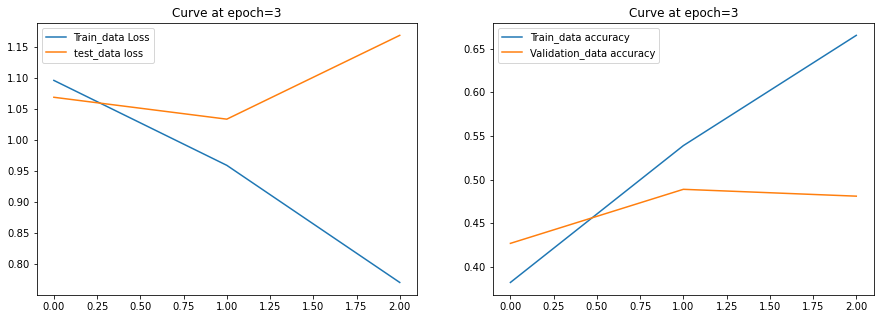

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(modelb.history['loss'], label = 'Train_data Loss')
plt.plot(modelb.history['val_loss'], label = 'test_data loss')
plt.title("Curve at epoch=3")
plt.legend()


plt.subplot(122)
plt.plot(modelb.history['accuracy'], label = 'Train_data accuracy')
plt.plot(modelb.history['val_accuracy'], label = 'Validation_data accuracy')
plt.title("Curve at epoch=3")
plt.legend()

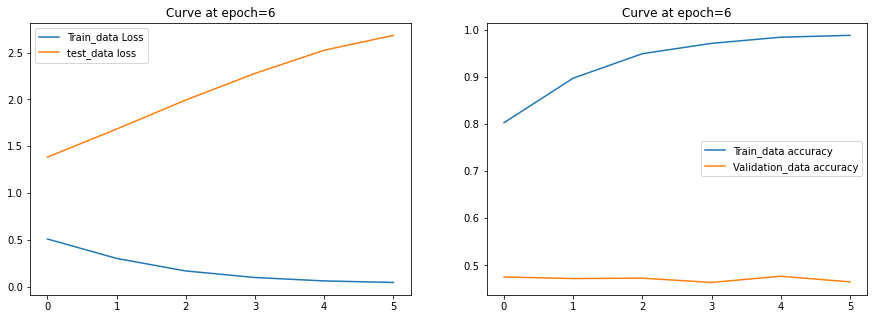

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(modelb_1.history['loss'], label = 'Train_data Loss')
plt.plot(modelb_1.history['val_loss'], label = 'test_data loss')
plt.title("Curve at epoch=6")
plt.legend()

plt.subplot(122)
plt.plot(modelb_1.history['accuracy'], label = 'Train_data accuracy')
plt.plot(modelb_1.history['val_accuracy'], label = 'Validation_data accuracy')
plt.title("Curve at epoch=6")
plt.legend()

**OBSERVATION:**

* At epoch=6 the model fits badly.

* Hence, we consider at epoch =3 and will further experiment with different parameters below.

*** At second n-fold(1):**

In [ ]:
encoded_train1 = tokenizerb.batch_encode_plus(train_set1, pad_to_max_length=True, max_length=30)
encoded_test1 = tokenizerb.batch_encode_plus(test_set1, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(1):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train1['input_ids'], df_train1.label.values, test_size=0.3)

x_test = encoded_test1['input_ids']

In [ ]:
train_df1 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df1 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df1 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#Epochs=3
modelb_1 = model_b.fit(train_df1,steps_per_epoch=step,validation_data=valid_df1,epochs=3)

Epoch 1/3
94/94 [==============================] - 6s 61ms/step - accuracy: 0.6626 - loss: 0.8371 - val_accuracy: 0.6456 - val_loss: 0.8520
Epoch 2/3
94/94 [==============================] - 6s 61ms/step - accuracy: 0.7724 - loss: 0.5698 - val_accuracy: 0.6456 - val_loss: 0.9469
Epoch 3/3
94/94 [==============================] - 6s 62ms/step - accuracy: 0.8647 - loss: 0.3555 - val_accuracy: 0.6394 - val_loss: 1.1819


In [ ]:
print("validation accuracy {}".format(np.mean(modelb_1.history['val_accuracy'])))
print("validation loss {}".format(np.mean(modelb_1.history['val_loss'])))
print("accuracy {}".format(np.mean(modelb_1.history['accuracy'])))
print("loss {}".format(np.mean(modelb_1.history['loss'])))

validation accuracy 0.6435643235842387
validation loss 0.9935728907585144
accuracy 0.7665669123331705
loss 0.5874675412972769


In [ ]:
print("validation accuracy {}".format(np.std(modelb_1.history['val_accuracy'])))
print("validation loss {}".format(np.std(modelb_1.history['val_loss'])))
print("accuracy {}".format(np.std(modelb_1.history['accuracy'])))
print("loss {}".format(np.std(modelb_1.history['loss'])))

validation accuracy 0.0029170957770350047
validation loss 0.13867938743421915
accuracy 0.08262270195965303
loss 0.1969819031804678


*** At third n-fold(2):**

In [ ]:
encoded_train2 = tokenizerb.batch_encode_plus(train_set2, pad_to_max_length=True, max_length=30)
encoded_test2 = tokenizerb.batch_encode_plus(test_set2, pad_to_max_length=True, max_length=30)

In [ ]:
# using the first fold(2):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train2['input_ids'], df_train2.label.values, test_size=0.3)

x_test = encoded_test2['input_ids']

In [ ]:
train_df2 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df2 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df2 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#Epochs=3
modelb_2 = model_b.fit(train_df2,steps_per_epoch=step,validation_data=valid_df2,epochs=3)

Epoch 1/3
94/94 [==============================] - 6s 61ms/step - accuracy: 0.8039 - loss: 0.5552 - val_accuracy: 0.8082 - val_loss: 0.5633
Epoch 2/3
94/94 [==============================] - 6s 62ms/step - accuracy: 0.8930 - loss: 0.3026 - val_accuracy: 0.7991 - val_loss: 0.6548
Epoch 3/3
94/94 [==============================] - 6s 61ms/step - accuracy: 0.9433 - loss: 0.1680 - val_accuracy: 0.7962 - val_loss: 0.7782


In [ ]:
print("validation accuracy {}".format(np.mean(modelb_2.history['val_accuracy'])))
print("validation loss {}".format(np.mean(modelb_2.history['val_loss'])))
print("accuracy {}".format(np.mean(modelb_2.history['accuracy'])))
print("loss {}".format(np.mean(modelb_2.history['loss'])))

validation accuracy 0.8011550704638163
validation loss 0.6654345591862997
accuracy 0.8800697724024454
loss 0.34189845621585846


In [ ]:
print("validation accuracy {}".format(np.std(modelb_2.history['val_accuracy'])))
print("validation loss {}".format(np.std(modelb_2.history['val_loss'])))
print("accuracy {}".format(np.std(modelb_2.history['accuracy'])))
print("loss {}".format(np.std(modelb_2.history['loss'])))

validation accuracy 0.005097305425129097
validation loss 0.08803839857807944
accuracy 0.05762547901100237
loss 0.16050481270879483


  Model_name at epoch=3                  |  n-fold      |  mean_loss    | mean_val_loss  | mean_accuracy | mean_val_accuracy |
 ----------------------------------------|--------------|---------------|----------------|---------------|-------------------|
 distilbert-base-multilingual-cased               |   1          | 0.94          | 1.08           |  0.52         |  0.46             |
 distilbert-base-multilingual-cased               |   2          | 0.58          | 0.99           |  0.76         |  0.64             |
 distilbert-base-multilingual-cased               |   3          | 0.34          | 0.66           |  0.88         |  0.80             |

# **Visualization:**

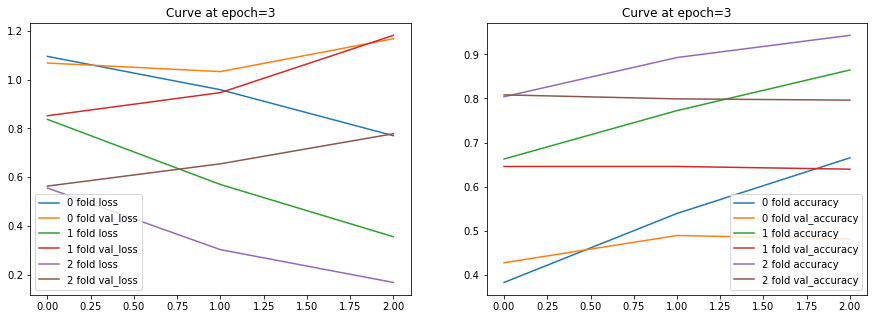

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(modelb.history['loss'], label = '0 fold loss')
plt.plot(modelb.history['val_loss'], label = '0 fold val_loss')
plt.plot(modelb_1.history['loss'], label = '1 fold loss')
plt.plot(modelb_1.history['val_loss'], label = '1 fold val_loss')
plt.plot(modelb_2.history['loss'], label = '2 fold loss')
plt.plot(modelb_2.history['val_loss'], label = '2 fold val_loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(modelb.history['accuracy'], label = '0 fold accuracy')
plt.plot(modelb.history['val_accuracy'], label = '0 fold val_accuracy')
plt.plot(modelb_1.history['accuracy'], label = '1 fold accuracy')
plt.plot(modelb_1.history['val_accuracy'], label = '1 fold val_accuracy')
plt.plot(modelb_2.history['accuracy'], label = '2 fold accuracy')
plt.plot(modelb_2.history['val_accuracy'], label = '2 fold val_accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATION:**


* The DistillBERT model is performing well at epoch = 3 and n-fold [0] 

* We will be further experimenting and fine tuning this model with different values at the same epoch and n-fold value.

# **Implementing Model: "Bert-base-multilingual-cased"**

**Overview:**

* The BERT model was proposed in BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding by Jacob Devlin, Ming-Wei Chang, Kenton Lee and Kristina Toutanova. It’s a bidirectional transformer pre-trained using a combination of masked language modeling objective and next sentence prediction on a large corpus comprising the Toronto Book Corpus and Wikipedia.

**The abstract from the paper is the following:**

* We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.

* BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).


* BERT is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

* BERT was trained with the masked language modeling (MLM) and next sentence prediction (NSP) objectives. It is efficient at predicting masked tokens and at NLU in general, but is not optimal for text generation.

In [ ]:
model_bert=model_defination(strategy,"bert-base-multilingual-cased")

In [ ]:
model_bert.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 30)]              0         
_________________________________________________________________
tf_bert_model (TFBertModel)  ((None, 30, 768), (None,  177853440 
_________________________________________________________________
tf_op_layer_strided_slice_3  [(None, 768)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 2307      
Total params: 177,855,747
Trainable params: 177,855,747
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

*** At the first n-fold(0):**

In [ ]:
encoded_train_bert = tokenizer_bert.batch_encode_plus(train_set, pad_to_max_length=True, max_length=30)
encoded_testb_bert = tokenizer_bert.batch_encode_plus(test_set, pad_to_max_length=True, max_length=30)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train_bert['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_testb_bert['input_ids']

In [ ]:
train_df_bert = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df_bert = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df_bert = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#Epochs=2
modelbert = model_bert.fit(train_df_bert,steps_per_epoch=step,validation_data=valid_df_bert,epochs=2)

Epoch 1/2
94/94 [==============================] - 21s 220ms/step - accuracy: 0.4233 - loss: 1.0700 - val_accuracy: 0.4889 - val_loss: 1.0308
Epoch 2/2
94/94 [==============================] - 8s 90ms/step - accuracy: 0.5812 - loss: 0.8940 - val_accuracy: 0.5050 - val_loss: 1.0623


In [ ]:
print("validation accuracy {}".format(np.mean(modelbert.history['val_accuracy'])))
print("validation loss {}".format(np.mean(modelbert.history['val_loss'])))
print("accuracy {}".format(np.mean(modelbert.history['accuracy'])))
print("loss {}".format(np.mean(modelbert.history['loss'])))

validation accuracy 0.4969059079885483
validation loss 1.0465161800384521
accuracy 0.5022440105676651
loss 0.9820247292518616


In [ ]:
print("validation accuracy {}".format(np.std(modelbert.history['val_accuracy'])))
print("validation loss {}".format(np.std(modelbert.history['val_loss'])))
print("accuracy {}".format(np.std(modelbert.history['accuracy'])))
print("loss {}".format(np.std(modelbert.history['loss'])))

validation accuracy 0.00804455578327179
validation loss 0.015735745429992676
accuracy 0.07895611226558685
loss 0.08799558877944946


In [ ]:
#Epochs=3
modelbert_3 = model_bert.fit(train_df_bert,steps_per_epoch=step,validation_data=valid_df_bert,epochs=3)

Epoch 1/3
94/94 [==============================] - 8s 90ms/step - accuracy: 0.7326 - loss: 0.6478 - val_accuracy: 0.4839 - val_loss: 1.3059
Epoch 2/3
94/94 [==============================] - 8s 90ms/step - accuracy: 0.8509 - loss: 0.3845 - val_accuracy: 0.4818 - val_loss: 1.7349
Epoch 3/3
94/94 [==============================] - 9s 91ms/step - accuracy: 0.9296 - loss: 0.1980 - val_accuracy: 0.4839 - val_loss: 2.0547


In [ ]:
print("validation accuracy {}".format(np.mean(modelbert_3.history['val_accuracy'])))
print("validation loss {}".format(np.mean(modelbert_3.history['val_loss'])))
print("accuracy {}".format(np.mean(modelbert_3.history['accuracy'])))
print("loss {}".format(np.mean(modelbert_3.history['loss'])))

validation accuracy 0.483223299185435
validation loss 1.6984804073969524
accuracy 0.8377105196317037
loss 0.4101218531529109


In [ ]:
print("validation accuracy {}".format(np.std(modelbert_3.history['val_accuracy'])))
print("validation loss {}".format(np.std(modelbert_3.history['val_loss'])))
print("accuracy {}".format(np.std(modelbert_3.history['accuracy'])))
print("loss {}".format(np.std(modelbert_3.history['loss'])))

validation accuracy 0.0009723558930453326
validation loss 0.30679535832708416
accuracy 0.08095340606324775
loss 0.18452737734997143


# **Visualization:**

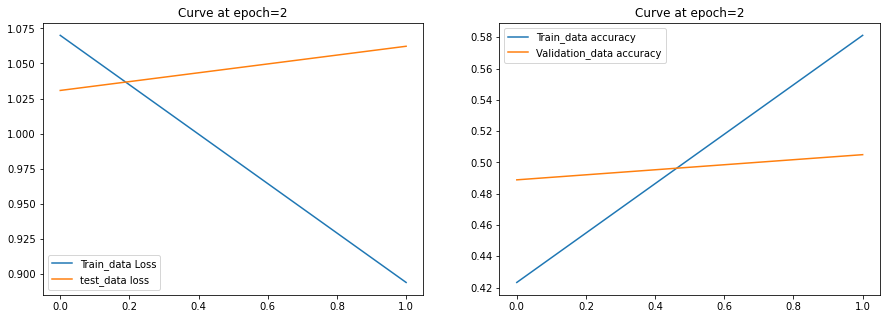

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(modelbert.history['loss'], label = 'Train_data Loss')
plt.plot(modelbert.history['val_loss'], label = 'test_data loss')
plt.title("Curve at epoch=2")
plt.legend()

plt.subplot(122)
plt.plot(modelbert.history['accuracy'], label = 'Train_data accuracy')
plt.plot(modelbert.history['val_accuracy'], label = 'Validation_data accuracy')
plt.title("Curve at epoch=2")
plt.legend()

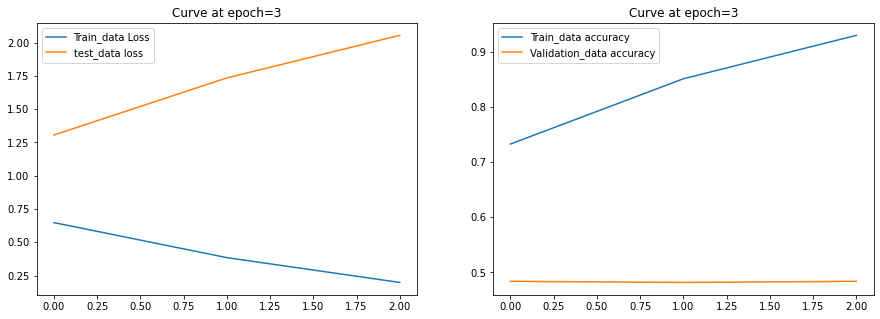

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(modelbert_3.history['loss'], label = 'Train_data Loss')
plt.plot(modelbert_3.history['val_loss'], label = 'test_data loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(modelbert_3.history['accuracy'], label = 'Train_data accuracy')
plt.plot(modelbert_3.history['val_accuracy'], label = 'Validation_data accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATION:**


* For the model Bert-base-multilingual-cased the model performs well at epoch = 2

*** At the second n-fold(1):**

In [ ]:
encoded_train_bert1 = tokenizer_bert.batch_encode_plus(train_set1, pad_to_max_length=True, max_length=30)
encoded_testb_bert1 = tokenizer_bert.batch_encode_plus(test_set1, pad_to_max_length=True, max_length=30)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train_bert1['input_ids'], df_train1.label.values, test_size=0.3)

x_test = encoded_testb_bert1['input_ids']

In [ ]:
train_df_bert1 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df_bert1 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df_bert1 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#Epochs=2
modelbert1 = model_bert.fit(train_df_bert1,steps_per_epoch=step,validation_data=valid_df_bert1,epochs=2)

Epoch 1/2
94/94 [==============================] - 8s 87ms/step - accuracy: 0.6643 - loss: 0.8367 - val_accuracy: 0.6799 - val_loss: 0.7970
Epoch 2/2
94/94 [==============================] - 9s 91ms/step - accuracy: 0.7876 - loss: 0.5428 - val_accuracy: 0.6696 - val_loss: 0.9105


In [ ]:
print("validation accuracy {}".format(np.mean(modelbert1.history['val_accuracy'])))
print("validation loss {}".format(np.mean(modelbert1.history['val_loss'])))
print("accuracy {}".format(np.mean(modelbert1.history['accuracy'])))
print("loss {}".format(np.mean(modelbert1.history['loss'])))

validation accuracy 0.6747111976146698
validation loss 0.8537834882736206
accuracy 0.725939154624939
loss 0.689777284860611


In [ ]:
print("validation accuracy {}".format(np.std(modelbert1.history['val_accuracy'])))
print("validation loss {}".format(np.std(modelbert1.history['val_loss'])))
print("accuracy {}".format(np.std(modelbert1.history['accuracy'])))
print("loss {}".format(np.std(modelbert1.history['loss'])))

validation accuracy 0.005156785249710083
validation loss 0.05675464868545532
accuracy 0.061627328395843506
loss 0.14694854617118835


* At the third n-fold(2):

In [ ]:
encoded_train_bert2 = tokenizer_bert.batch_encode_plus(train_set2, pad_to_max_length=True, max_length=30)
encoded_testb_bert2 = tokenizer_bert.batch_encode_plus(test_set2, pad_to_max_length=True, max_length=30)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train_bert2['input_ids'], df_train2.label.values, test_size=0.3)

x_test = encoded_testb_bert2['input_ids']

In [ ]:
train_df_bert2 = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df_bert2 = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df_bert2 = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#Epochs=2
modelbert2 = model_bert.fit(train_df_bert2,steps_per_epoch=step,validation_data=valid_df_bert2,epochs=2)

Epoch 1/2
94/94 [==============================] - 8s 90ms/step - accuracy: 0.7724 - loss: 0.5857 - val_accuracy: 0.7814 - val_loss: 0.5973
Epoch 2/2
94/94 [==============================] - 10s 106ms/step - accuracy: 0.8747 - loss: 0.3413 - val_accuracy: 0.7591 - val_loss: 0.7410


In [ ]:
print("validation accuracy {}".format(np.mean(modelbert2.history['val_accuracy'])))
print("validation loss {}".format(np.mean(modelbert2.history['val_loss'])))
print("accuracy {}".format(np.mean(modelbert2.history['accuracy'])))
print("loss {}".format(np.mean(modelbert2.history['loss'])))

validation accuracy 0.7702144980430603
validation loss 0.6691281199455261
accuracy 0.8235538303852081
loss 0.46349552273750305


In [ ]:
print("validation accuracy {}".format(np.std(modelbert2.history['val_accuracy'])))
print("validation loss {}".format(np.std(modelbert2.history['val_loss'])))
print("accuracy {}".format(np.std(modelbert2.history['accuracy'])))
print("loss {}".format(np.std(modelbert2.history['loss'])))

validation accuracy 0.011138617992401123
validation loss 0.07186591625213623
accuracy 0.05111369490623474
loss 0.12222495675086975


  Model_name at epoch=3                  |  n-fold      |  mean_loss    | mean_val_loss  | mean_accuracy | mean_val_accuracy |
 ----------------------------------------|--------------|---------------|----------------|---------------|-------------------|
 Bert-base-multilingual-cased               |   1          | 0.41          | 1.69           |  0.83         |  0.48             |
 Bert-base-multilingual-cased               |   2          | 0.68          | 0.85           |  0.72         |  0.67             |
 Bert-base-multilingual-cased               |   3          | 0.46          | 0.66           |  0.82         |  0.77             |
 

# **Visualization:**

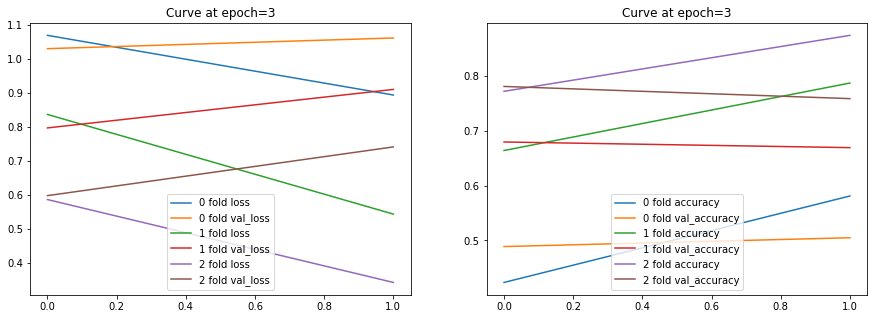

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(modelbert.history['loss'], label = '0 fold loss')
plt.plot(modelbert.history['val_loss'], label = '0 fold val_loss')
plt.plot(modelbert1.history['loss'], label = '1 fold loss')
plt.plot(modelbert1.history['val_loss'], label = '1 fold val_loss')
plt.plot(modelbert2.history['loss'], label = '2 fold loss')
plt.plot(modelbert2.history['val_loss'], label = '2 fold val_loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(modelbert.history['accuracy'], label = '0 fold accuracy')
plt.plot(modelbert.history['val_accuracy'], label = '0 fold val_accuracy')
plt.plot(modelbert1.history['accuracy'], label = '1 fold accuracy')
plt.plot(modelbert1.history['val_accuracy'], label = '1 fold val_accuracy')
plt.plot(modelbert2.history['accuracy'], label = '2 fold accuracy')
plt.plot(modelbert2.history['val_accuracy'], label = '2 fold val_accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATIONS:**

* BERT model is performing good at epoch =2 and at the first n-fold(0).

* We will further fine tune the parameter and do the experiments at first n-fold(0) for all the the below models:

    1. XLM-RoBERTA BASE
    2. DistillBERT
    3. BERT

### 5. Fine-tune the Models
---
*(You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning. As always, automate what you can. Fine-tune the hyperparameters using cross-validation. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.)*

**1. XLM-RoBERTa BASE:**

****at epoch = 3 and at the fist fold(n-fold[0]):****

* Build the model with different parameters for Dense layer and activation along different loss value.

* Changing the MAX_LEN value to 80 to change the input_layer shape

In [ ]:
def model_defination(strategy,transformer):
    with strategy.scope():
        encoder = TFAutoModel.from_pretrained(transformer)
        input_layer = Input(shape=(80,), dtype=tf.int32, name="input_layer")
        sequence_output = encoder(input_layer)[0]
        cls_token = sequence_output[:, 0, :]
        output_layer = Dense(1, activation='sigmoid')(cls_token)
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(
            Adam(lr=1e-5), 
            loss='binary_crossentropy', 
            metrics=['accuracy']
        )
        return model

In [ ]:
model1=model_defination(strategy,"jplu/tf-xlm-roberta-base")

In [ ]:
model1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 80)]              0         
_________________________________________________________________
tf_roberta_model_2 (TFRobert ((None, 80, 768), (None,  278043648 
_________________________________________________________________
tf_op_layer_strided_slice_4  [(None, 768)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 769       
Total params: 278,044,417
Trainable params: 278,044,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tokenizer1 = AutoTokenizer.from_pretrained('jplu/tf-xlm-roberta-base')

In [ ]:
encoded_train = tokenizer1.batch_encode_plus(train_set, pad_to_max_length=True, max_length=80)
encoded_test = tokenizer1.batch_encode_plus(test_set, pad_to_max_length=True, max_length=80)

In [ ]:
# using the first fold(0):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

In [ ]:
train_df = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_x = model1.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=3)

Epoch 1/3
94/94 [==============================] - 26s 276ms/step - loss: 0.0955 - accuracy: 0.3176 - val_loss: -0.0378 - val_accuracy: 0.3201
Epoch 2/3
94/94 [==============================] - 12s 125ms/step - loss: 0.0383 - accuracy: 0.3222 - val_loss: -0.0058 - val_accuracy: 0.3201
Epoch 3/3
94/94 [==============================] - 12s 126ms/step - loss: 0.0234 - accuracy: 0.3165 - val_loss: -0.2367 - val_accuracy: 0.3201


In [ ]:
print("validation accuracy {}".format(np.mean(model_x.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_x.history['val_loss'])))
print("accuracy {}".format(np.mean(model_x.history['accuracy'])))
print("loss {}".format(np.mean(model_x.history['loss'])))

validation accuracy 0.32013198733329773
validation loss -0.09343871101737022
accuracy 0.31876106063524884
loss 0.052376936500271164


In [ ]:
print("validation accuracy {}".format(np.std(model_x.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_x.history['val_loss'])))
print("accuracy {}".format(np.std(model_x.history['accuracy'])))
print("loss {}".format(np.std(model_x.history['loss'])))

validation accuracy 0.0
validation loss 0.10212164099867103
accuracy 0.0024881144587335954
loss 0.031072981031964132


**2. distilbert-base-multilingual-cased:**

*at epoch = 3 and at the fist fold(n-fold[0]):*

In [ ]:
model_d=model_defination(strategy,"distilbert-base-multilingual-cased")

In [ ]:
model_d.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 80)]              0         
_________________________________________________________________
tf_distil_bert_model_1 (TFDi ((None, 80, 768),)        134734080 
_________________________________________________________________
tf_op_layer_strided_slice_4  [(None, 768)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 769       
Total params: 134,734,849
Trainable params: 134,734,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tokenizer_b = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

In [ ]:
encoded_train = tokenizer_b.batch_encode_plus(train_set, pad_to_max_length=True, max_length=80)
encoded_test = tokenizer_b.batch_encode_plus(test_set, pad_to_max_length=True, max_length=80)

In [ ]:
# using the first fold(0):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

In [ ]:
train_df = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_d = model_d.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=3)

Epoch 1/3
94/94 [==============================] - 15s 160ms/step - loss: 0.0244 - accuracy: 0.3254 - val_loss: -0.1957 - val_accuracy: 0.3119
Epoch 2/3
94/94 [==============================] - 7s 69ms/step - loss: -1.9987 - accuracy: 0.3490 - val_loss: -2.5136 - val_accuracy: 0.3630
Epoch 3/3
94/94 [==============================] - 7s 71ms/step - loss: -4.2549 - accuracy: 0.4233 - val_loss: -2.9112 - val_accuracy: 0.3981


In [ ]:
print("validation accuracy {}".format(np.mean(model_d.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_d.history['val_loss'])))
print("accuracy {}".format(np.mean(model_d.history['accuracy'])))
print("loss {}".format(np.mean(model_d.history['loss'])))

validation accuracy 0.35767324765523273
validation loss -1.8735044399897258
accuracy 0.3658854067325592
loss -2.0764222082992396


In [ ]:
print("validation accuracy {}".format(np.std(model_d.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_d.history['val_loss'])))
print("accuracy {}".format(np.std(model_d.history['accuracy'])))
print("loss {}".format(np.std(model_d.history['loss'])))

validation accuracy 0.035403305117605144
validation loss 1.1974401095008378
accuracy 0.041717850959862655
loss 1.747877350867777


3. Bert-base-multilingual-cased

*at epoch = 3 and at the fist fold(n-fold[0]):*

In [ ]:
model_b=model_defination(strategy,"bert-base-multilingual-cased")

In [ ]:
model_b.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 80)]              0         
_________________________________________________________________
tf_bert_model_1 (TFBertModel ((None, 80, 768), (None,  177853440 
_________________________________________________________________
tf_op_layer_strided_slice_6  [(None, 768)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 769       
Total params: 177,854,209
Trainable params: 177,854,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tokenizer_d = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
encoded_train = tokenizer_d.batch_encode_plus(train_set, pad_to_max_length=True, max_length=80)
encoded_test = tokenizer_d.batch_encode_plus(test_set, pad_to_max_length=True, max_length=80)

In [ ]:
# using the first fold(0):

X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

In [ ]:
train_df = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_b = model_b.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=3)

Epoch 1/3
94/94 [==============================] - 24s 255ms/step - loss: -0.5097 - accuracy: 0.3138 - val_loss: -2.7183 - val_accuracy: 0.3729
Epoch 2/3
94/94 [==============================] - 10s 109ms/step - loss: -3.7878 - accuracy: 0.4109 - val_loss: -3.9206 - val_accuracy: 0.4451
Epoch 3/3
94/94 [==============================] - 10s 110ms/step - loss: -5.6252 - accuracy: 0.4774 - val_loss: -4.2297 - val_accuracy: 0.4344


In [ ]:
print("validation accuracy {}".format(np.mean(model_b.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_b.history['val_loss'])))
print("accuracy {}".format(np.mean(model_b.history['accuracy'])))
print("loss {}".format(np.mean(model_b.history['loss'])))

validation accuracy 0.41749173402786255
validation loss -3.622880140940348
accuracy 0.400709201892217
loss -3.307592292626699


In [ ]:
print("validation accuracy {}".format(np.std(model_b.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_b.history['val_loss'])))
print("accuracy {}".format(np.std(model_b.history['accuracy'])))
print("loss {}".format(np.std(model_b.history['loss'])))

validation accuracy 0.03180760760405458
validation loss 0.6519821262911744
accuracy 0.06716266099003296
loss 2.1158096921621676


**Comparing the results of the above Models:**

 
 Model_names                             |  epoch value |  loss    | val_loss  | accuracy | val_accuracy |
 ----------------------------------------|--------------|----------|-----------|----------|--------------|
 XLM-RoBERTa Model: (Base)               |   3          | 0.05     |  -0.09      |  0.31    |  0.32        |
 distilbert-base-multilingual-cased      |   3          | -2.07     | -1.87      |  0.36    |  0.35        |     
 Bert-base-multilingual-cased            |   2          |-3.30     | -3.62      |  0.40    |  0.41        |

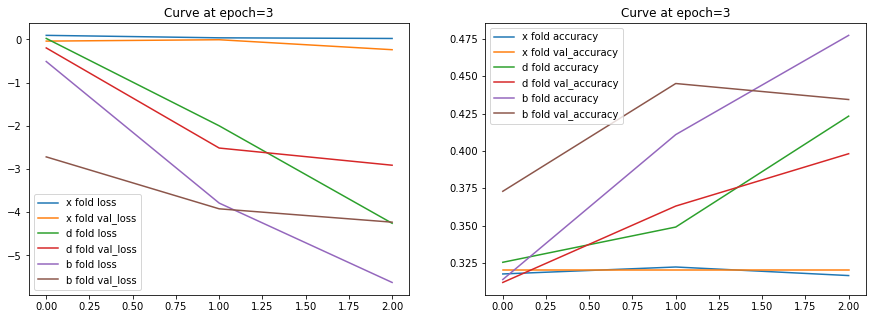

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(model_x.history['loss'], label = 'x fold loss')
plt.plot(model_x.history['val_loss'], label = 'x fold val_loss')
plt.plot(model_d.history['loss'], label = 'd fold loss')
plt.plot(model_d.history['val_loss'], label = 'd fold val_loss')
plt.plot(model_b.history['loss'], label = 'b fold loss')
plt.plot(model_b.history['val_loss'], label = 'b fold val_loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(model_x.history['accuracy'], label = 'x fold accuracy')
plt.plot(model_x.history['val_accuracy'], label = 'x fold val_accuracy')
plt.plot(model_d.history['accuracy'], label = 'd fold accuracy')
plt.plot(model_d.history['val_accuracy'], label = 'd fold val_accuracy')
plt.plot(model_b.history['accuracy'], label = 'b fold accuracy')
plt.plot(model_b.history['val_accuracy'], label = 'b fold val_accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATIONS:**

* The best epoch value for the models are 3.

* The models are getting fit at first n-fold without getting overfit.

* DistillBERT model is performing the best among all the other three above models.

* Hence, we will use "DistillBERT" model for further prediction of the target value: "labels".

**Our final model which we are going to use is the "DistillBERT MODEL".**

**Let us run the "DistillBERT" model on the translated data and check the performance of the model:**

In [ ]:
# shuffle
df1 = shuffle(train)

# initialize kfold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1024)

# for stratification
y1 = df1['label']

# Put the folds into a list. This is a list of tuples.
fold_list = list(kf.split(df1, y1))

train_df_list1 = []
val_df_list1 = []

for i, fold in enumerate(fold_list):

    # map the train and val index values to dataframe rows
    df1_train = df1[df1.index.isin(fold[0])]
    df1_val = df1[df1.index.isin(fold[1])]
    
    train_df_list1.append(df1_train)
    val_df_list1.append(df1_val)
    
    

print(len(train_df_list1))
print(len(val_df_list1))

3
3


In [ ]:
df1_train = train_df_list1[0]

In [ ]:
train1 = df1_train[['premise','hypothesis']].values.tolist()
test = test[['premise','hypothesis']].values.tolist()

In [ ]:
encoded_train = tokenizer_b.batch_encode_plus(train1, pad_to_max_length=True, max_length=30)
encoded_test = tokenizer_b.batch_encode_plus(test, pad_to_max_length=True, max_length=30)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], df_train.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

In [ ]:
train = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

In [ ]:
#At epochs=3
model_d1 = model_d.fit(train,steps_per_epoch=step,validation_data=valid,epochs=3)

Epoch 1/3
94/94 [==============================] - 5s 57ms/step - loss: -0.0144 - accuracy: 0.3249 - val_loss: 0.5046 - val_accuracy: 0.3123
Epoch 2/3
94/94 [==============================] - 5s 57ms/step - loss: -0.4292 - accuracy: 0.3267 - val_loss: 0.5887 - val_accuracy: 0.3123
Epoch 3/3
94/94 [==============================] - 6s 59ms/step - loss: -1.1190 - accuracy: 0.3236 - val_loss: 0.3864 - val_accuracy: 0.3123


In [ ]:
print("validation accuracy {}".format(np.mean(model_d1.history['val_accuracy'])))
print("validation loss {}".format(np.mean(model_d1.history['val_loss'])))
print("accuracy {}".format(np.mean(model_d1.history['accuracy'])))
print("loss {}".format(np.mean(model_d1.history['loss'])))


validation accuracy 0.3122937083244324
validation loss 0.49325306216875714
accuracy 0.32504986723264057
loss -0.520857174259921


In [ ]:
print("validation accuracy {}".format(np.std(model_d1.history['val_accuracy'])))
print("validation loss {}".format(np.std(model_d1.history['val_loss'])))
print("accuracy {}".format(np.std(model_d1.history['accuracy'])))
print("loss {}".format(np.std(model_d1.history['loss'])))

validation accuracy 0.0
validation loss 0.08294951883866414
accuracy 0.0012946932779368072
loss 0.45560202323233095


# **Visualization:**

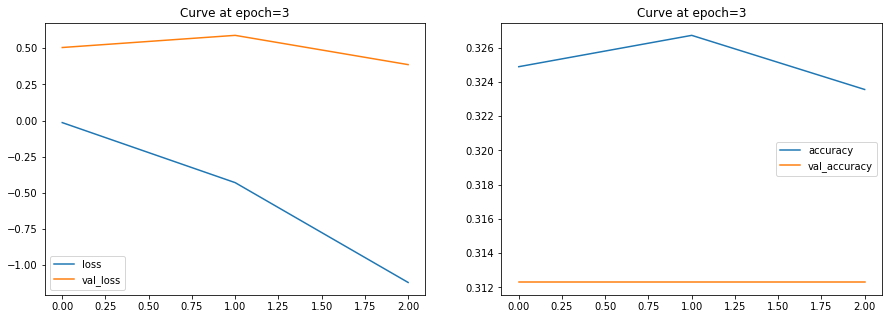

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(model_d1.history['loss'], label = 'loss')
plt.plot(model_d1.history['val_loss'], label = 'val_loss')
plt.title("Curve at epoch=3")
plt.legend()

plt.subplot(122)
plt.plot(model_d1.history['accuracy'], label = 'accuracy')
plt.plot(model_d1.history['val_accuracy'], label = 'val_accuracy')
plt.title("Curve at epoch=3")
plt.legend()

**OBSERVATION:**

* The translated data is not performing good where all the sentences has been translated into english.

### 6. Reporting Results
---
*(Use appropriate methods to present the results including tables, plots, and bullet points. Explain how the analysis process and models solve the problem. Make sure you highlight the big picture first.
Explain why your solution achieves the objective. Don’t forget to present interesting points you noticed along the way. Describe what worked and what did not. List your assumptions and your system’s limitations.)*

**Generating the submission file as per the competition:**

* From the above we would consider "DistillBERT" model here to perform the prediction of the target attribute "label" on the test data given in the competition.

* And generate the submission file to submit the predictions.

In [ ]:
# Given test data:

test_data.head(5)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


Reading the given Submission File from the competition:

In [ ]:
sub = pd.read_csv("../input/contradictory-my-dear-watson/sample_submission.csv")

**Prediction:**

* Making the prediction using the model_d(defined for DistillBERT model) and the test data(test_df) which was sliced using the tensor flow for this model above.

In [ ]:
test_predict = model_d.predict(test_df, verbose=1)
sub['prediction'] = test_predict.argmax(axis=1)

41/41 [==============================] - 3s 69ms/step


**Top 10 of the submission file generated are as below:**

In [ ]:
sub.head(10)

,id,prediction
0,c6d58c3f69,0
1,cefcc82292,0
2,e98005252c,0
3,58518c10ba,0
4,c32b0d16df,0
5,aa2510d454,0
6,865d1c7b16,0
7,a16f7ed56b,0
8,6d9fa191e6,0
9,c156e8fed5,0


**Writing the results to the new submission file generated as below:**

In [ ]:
sub.to_csv('Submission.csv', index=False)

**Displaying the submission results from the file written to:**

In [ ]:
submission = pd.read_csv('Submission.csv')
submission.head()

,id,prediction
0,c6d58c3f69,0
1,cefcc82292,0
2,e98005252c,0
3,58518c10ba,0
4,c32b0d16df,0


**OBSERVATIONS:**

* The best epoch value for the models are 3.

* The models are getting fit at first n-fold without getting overfit.

* DistillBERT model is performing the best among all the other three above models at the first fold which I have taken into consideration for training of the data during which we have fine tuned the selected models(XLM-RoBERTA, DistillBERT and BERT).

* The main reason for considering the above models are as this is the task where, it is to create an NLI model that assigns labels of 0, 1, or 2 (corresponding to entailment, neutral, and contradiction) to pairs of premises and hypotheses. Also, the hypothesis and premise are in multiple languages. 

* The chosen models are trained in more than 70 different languages which statisfies our data descriptionand the task.


* Based on this we were successfully able to generate the final submission results using the final selected model from our above analysis at different n-folds and epoch values.

**System Limitations:**

* The main limitation of the system here is : we had used the TPU strategy and the TPU utilization quota which was provided by Kaggle for this competition.

* These NLP pre-trained models are quite expensive and they require TPU accelerators to run and train fast.

* The time taken to run these models were more than expected and the TPU distribution strategy had to be sometimes re-run due issues arising when the model could not allocate space.

**Assumptions:**

* The assumption of running the models together on the three n-folds created had not worked out properly and the models were not performing as expected.

* Hence, to perform more analysis the models has been run on each n-fold and at different epoch values.


### 7. Conclusion
---
*(Briefly describe what you have done and what you have achieved. Discuss any shortcomings of the process and results. **Finally, discuss the lessons learned from doing the project**.)*


The expected outcome of the project is to predict whether a given hypothesis is related to its premise by contradiction, entailment, or whether neither of those is true (neutral).
For each sample in the test set, you must predict a 0, 1, or 2 value for the variable.
Those values map to the logical condition as:
0 == entailment
1 == neutral
2 == contradiction

* This project will help me in learning and exploring different Feature Engineering Techniques which have been taught in the course. 

* Explore the transformations and the scaling techniques being applied in a project.

* Apart from that the skills and knowledge which I will be getting to learn and enhance from this project will be:

Natural Language Processing related features:

• Natural language toolkit (NLTK) is the most popular library for natural language processing (NLP). The use of NLP to develop applications and services that can understand the human language and process them.

• The knowledge which we will be exploring under NLP will be : using fastText library for efficient learning of word representations and sentence classification.


TensorFlow related features:

1. Tokenization:
Representing the words in a tokenized way that a computer can process them and train them with a Neural network that can understand their meaning.

2. Sequencing:
Represent sentences by a sequence of numbers in the correct order for processing by a neural network to understand or maybe even generate new text.

3. Word Embeddings:
To get the meaning of the sentences to number, with numbers being tokens and represented as words is where we will be using the embedding feature.

The areas where I have learned the lessons are:

• How to use Keras along with TensorFlow for creating Data Input Pipelines for Optimization and Analyzation. Along with how to use accelerators for projects.

• How to use Bidirectional Encoder Representations from Transformers.

• The different pre-trained models that are used by BERT.

• How to use the k-fold technique on TPUs to prevent memory issues.

• How to deal with enhance the performance of models by preventing leakages.

### 8. References

References and Citations of the resources used while developing the Project is:

1. https://huggingface.co/transformers/task_summary.html

2. https://huggingface.co/transformers/index.html

3. https://en.wikipedia.org/wiki/TensorFlow

4. https://www.kaggle.com/pradeepmuniasamy/contradictory-my-dear-watson-everything-you-need

5. https://www.kaggle.com/vbookshelf/basics-of-bert-and-xlm-roberta-pytorch


6.	https://www.kaggle.com/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert?select=submission.csv

7.	https://www.kaggle.com/mattbast/training-transformers-with-tensorflow-and-tpus

8.	https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
